# West Nile Virus Prediction

West Nile virus is spread to humans from infected mosquito bites. West Nile virus is present throughout the world, from Africa and Europe, to North and South America. While most cases of the virus do not show symptoms those that do have very severe fever, headaches, nausea and vomiting, often requiring them to miss days of work. In about 10% of cases, that show symptoms, patients will die, in 2012 the United States had one its worst outbreaks leading to over 250 deaths. To prevent these cases countries have developed many control strategies, including spraying insecticides.

Spraying insecticides kills the adult mosquitoes, our primary concern is the adult female mosquito, who bites humans for blood. There are periods where there will be very few adult mosquitoes present, but the juvenile stages, often in water, will present and unreachable by spraying. Due to this fact we can hope to optimize our spraying by using years of trap collection data, along with locations and weather data, to find the best time for spraying to occur.

The dataset I have chosen in found on Kaggle, called West Nile Virus Prediction. It has a dataset containing <100,000 mosquito samples, and their status of virus present. Then a data set with weather conditions, temperature, sun, rain, sunset time, sunrise, and so on. I hope to use this data set to be able to predict the next outbreak of West Nile

The data has already been split into a test and training set. In the training set mosquitoes have been trapped at trap site across chicago, with longitude and latitude points. Then the mosquito traps were emptied and tested for the presence of west nile virus, the mosquitoes are identified down to the species level. The test sets include the years 2007, 2009, 2011, and 2013. While the test set does not include the presence of west nile virus in the mosquiotes collected for the years 2008, 2010, 2012, and 2014. The point of the data is predict the number of cases in these years in the test set, based off the data in the training set. 

First, I would like to do some EDA, by creating a map of the number of mosquitoes collected from traps across the city by different years. 

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as pl
#%matplotlib inline

from sklearn.neighbors import KernelDensity
from __future__ import print_function
import datetime
from sklearn.cross_validation import train_test_split
import csv
from sklearn import metrics
from sklearn.utils import shuffle

C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## EDA

In [3]:
mapdata = np.loadtxt("C:\Users\deanm\OneDrive\Documents\University of Idaho\Classes\Fall 2018\STAT 517\west_nile\input\mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('C:/Users/deanm/OneDrive/Documents/University of Idaho/Classes/Fall 2018/STAT 517/west_nile/input/train.csv', parse_dates=['Date'])[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent', 'Species']]
species = pd.np.unique(traps['Species'])

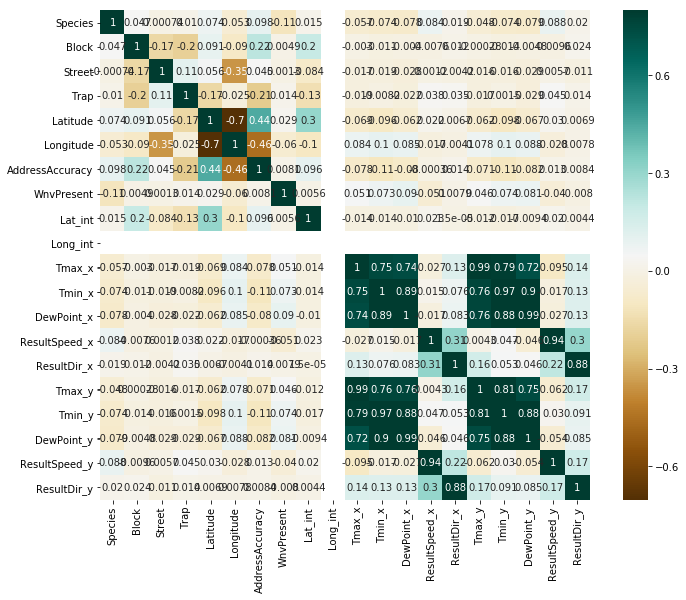

In [17]:
import seaborn as sns
hmap = train.corr()
pl.subplots(figsize=(12, 9))
sns.heatmap(hmap, vmax=.8,annot=True,cmap="BrBG", square=True);

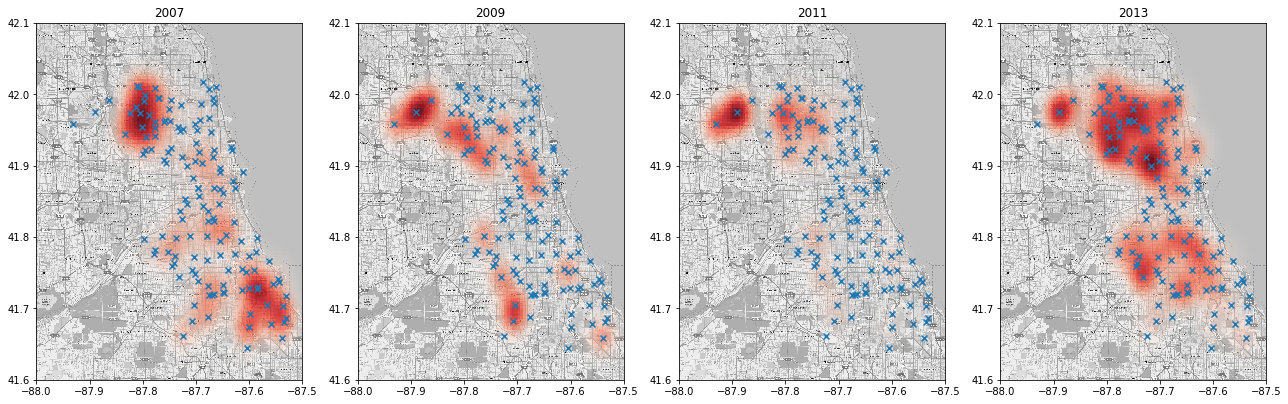

In [4]:
alpha_cm = pl.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

pl.figure(figsize=(18,6))
for year, subplot in zip([2007, 2009, 2011, 2013], [141, 142, 143, 144]):
    sightings = traps[(traps['WnvPresent'] > 0) & (traps['Date'].apply(lambda x: x.year) == year)]
    sightings = sightings.groupby(['Date', 'Trap','Longitude', 'Latitude']).max()['WnvPresent'].reset_index()
    X = sightings[['Longitude', 'Latitude']].values
    kd = KernelDensity(bandwidth=0.02)
    kd.fit(X)

    xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
    gridpoints = np.array([xv.ravel(),yv.ravel()]).T
    zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
    pl.subplot(subplot)
    pl.gca().set_title(year)
    pl.imshow(mapdata, 
               cmap=pl.get_cmap('gray'), 
               extent=lon_lat_box, 
               aspect=aspect)
    pl.imshow(zv, 
               origin='lower', 
               cmap=alpha_cm, 
               extent=lon_lat_box, 
               aspect=aspect)
    pl.tight_layout()
    locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
    pl.scatter(locations[:,0], locations[:,1], marker='x')

pl.savefig('heatmap.png')

From these maps is would appear that 2011 did not have a lot of WNV, while there was more in 2007 and 2009. Based on these maps 2013 seems to be an outbreak year, meaning this year may prove to be useful in models we build. 

SKIPPING [1]:2007 (CULEX ERRATICUS)		No sightings
SKIPPING [2]:2009 (CULEX ERRATICUS)		No sightings
SKIPPING [3]:2011 (CULEX ERRATICUS)		No sightings
         [4]:2013 (CULEX ERRATICUS)
         [5]:2007 (CULEX PIPIENS)
         [6]:2009 (CULEX PIPIENS)
         [7]:2011 (CULEX PIPIENS)
         [8]:2013 (CULEX PIPIENS)
         [9]:2007 (CULEX PIPIENS/RESTUANS)
         [10]:2009 (CULEX PIPIENS/RESTUANS)
         [11]:2011 (CULEX PIPIENS/RESTUANS)
         [12]:2013 (CULEX PIPIENS/RESTUANS)
         [13]:2007 (CULEX RESTUANS)
         [14]:2009 (CULEX RESTUANS)
         [15]:2011 (CULEX RESTUANS)
         [16]:2013 (CULEX RESTUANS)
         [17]:2007 (CULEX SALINARIUS)
         [18]:2009 (CULEX SALINARIUS)
         [19]:2011 (CULEX SALINARIUS)
         [20]:2013 (CULEX SALINARIUS)
SKIPPING [21]:2007 (CULEX TARSALIS)		No sightings
         [22]:2009 (CULEX TARSALIS)
         [23]:2011 (CULEX TARSALIS)
SKIPPING [24]:2013 (CULEX TARSALIS)		No sightings
         [25]:2007 (CULEX TERRITANS

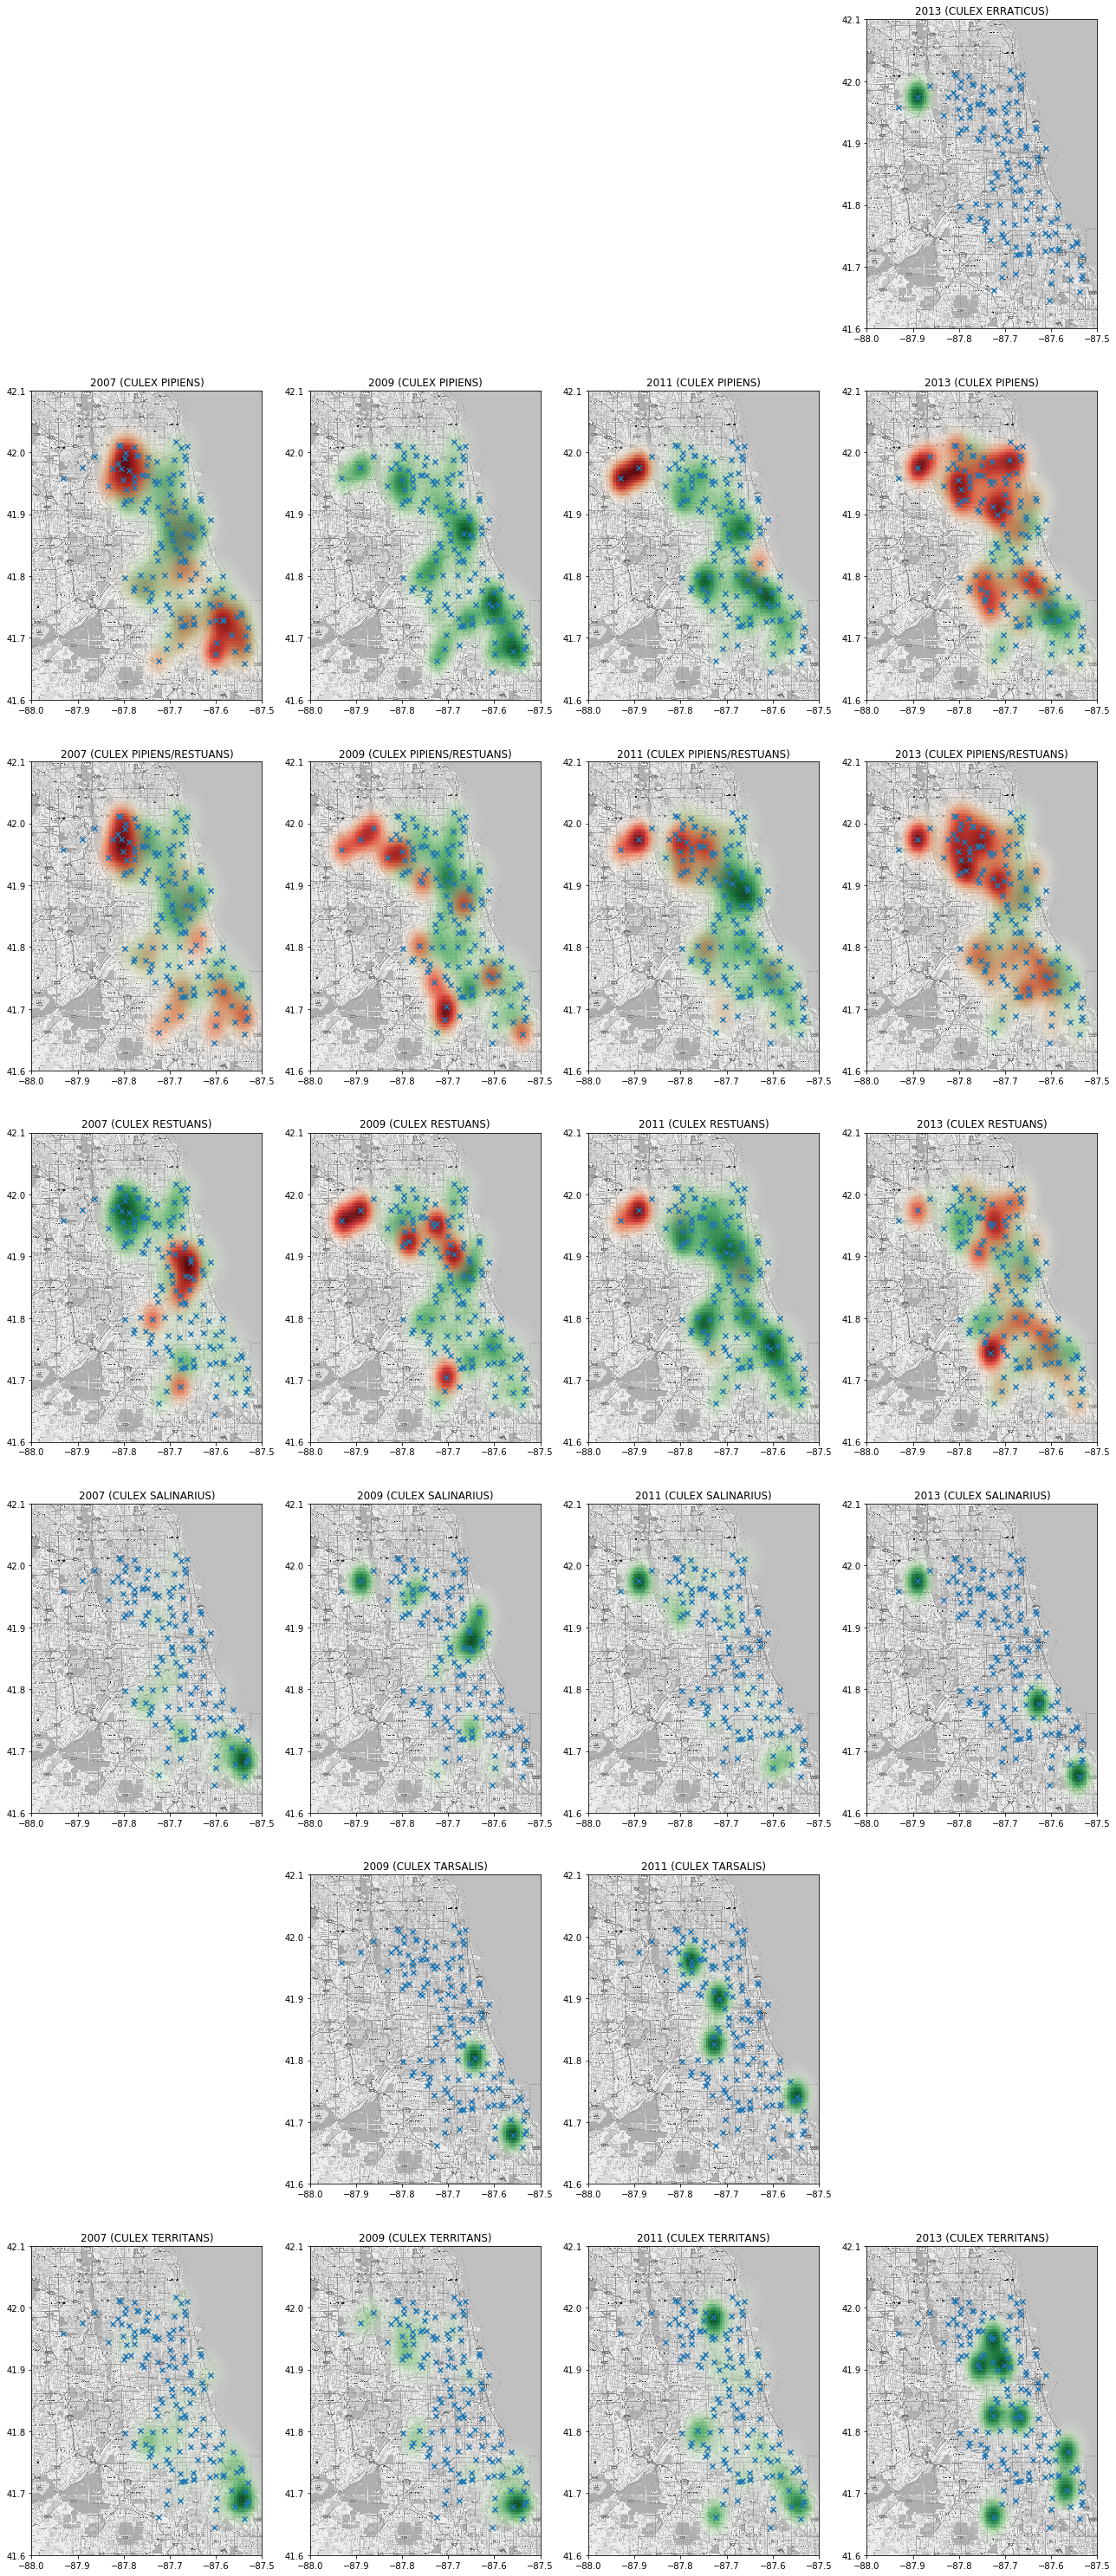

In [5]:
alpha_cm = pl.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
alpha_mcm = pl.cm.Greens
alpha_mcm._init()
alpha_mcm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

subplot = 0
numSpcs = len(species)
pl.figure(figsize=(18,6*numSpcs))
for spcsIndx in range(numSpcs):
    for year in [2007, 2009, 2011, 2013]:
        subplot += 1
        sightings = traps[(traps['Species'] == species[spcsIndx])
                          & (traps['WnvPresent'] > 0)
                          & (traps['Date'].apply(lambda x: x.year) == year)]
        sightings = sightings.groupby(['Date', 'Trap', 'Longitude', 'Latitude', 'Species']).max()['WnvPresent'].reset_index()
        mSightings = traps[(traps['Species'] == species[spcsIndx])
                          & (traps['Date'].apply(lambda x: x.year) == year)]
        mSightings = mSightings.groupby(['Date', 'Trap', 'Longitude', 'Latitude', 'Species']).max()['WnvPresent'].reset_index()
        if(len(mSightings) <= 0):
            print("SKIPPING [" + str(subplot) + "]:" + str(year) + " (" + species[spcsIndx] + ")\t\tNo sightings")
            continue

        mX = mSightings[['Longitude', 'Latitude']].values
        mkd = KernelDensity(bandwidth=0.02)
        mkd.fit(mX)
        mxv,myv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
        mGridpoints = np.array([mxv.ravel(),myv.ravel()]).T
        mzv = np.exp(mkd.score_samples(mGridpoints).reshape(100,100))

        pl.subplot(numSpcs, 4, subplot)
        pl.gca().set_title(str(year) + " (" + species[spcsIndx] + ")")
        pl.imshow(mapdata, 
                   cmap=pl.get_cmap('gray'), 
                   extent=lon_lat_box, 
                   aspect=aspect)
        pl.imshow(mzv, 
                   origin='lower', 
                   cmap=alpha_mcm, 
                   extent=lon_lat_box, 
                   aspect=aspect)
        if(len(sightings) > 0):
            X = sightings[['Longitude', 'Latitude']].values
            kd = KernelDensity(bandwidth=0.02)
            kd.fit(X)
            xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
            gridpoints = np.array([xv.ravel(),yv.ravel()]).T
            zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
            pl.imshow(zv, 
                       origin='lower', 
                       cmap=alpha_cm, 
                       extent=lon_lat_box, 
                       aspect=aspect)
        print("         [" + str(subplot) + "]:" + str(year) + " (" + species[spcsIndx] + ")")
        pl.tight_layout()
        locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
        pl.scatter(locations[:,0], locations[:,1], marker='x')

pl.savefig('heatmap.png')

As we can see in the above figure different species of mosquitoes prefer different areas of the city. This to us indicates species is an important determinenistic feature for our model. Since in the WNV by year map we don't see an virus in parts of the cities that has lots of mosquitoes. So, certain mosquito species are more likely to carry the disease than other, and in fact this is a well established in vector ecology, some mosquitoes are better hosts than others. 

Since mosquito species and location seem to be a good indicator of where disease is, I plan to create a few simple models with just this data set, excluding the weather information for now. I will use models we have learned in class, neural network, decision tree, random forest, and support vector machine. 

I will be using 10-fold cross validation for each model. Then calculating the accuracy score as the mean of these ten models, along with the mean AUC. Accuracy is defined as the precent of correct predictions the model makes. 

## Basic Models

In [14]:
train = pd.read_csv('C:/Users/deanm/OneDrive/Documents/University of Idaho/Classes/Fall 2018/STAT 517/west_nile/input/train.csv', parse_dates=['Date'])
train =train.drop(train.columns[3:7], axis=1)

features_categorical = ["Species"]
for c in features_categorical:
    train[c] = pd.Categorical(train[c]).codes

In [15]:
train

Date                                            Address  Species  \
0     2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...        2   
1     2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...        3   
2     2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA        3   
3     2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA        2   
4     2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA        3   
5     2007-05-29   1500 West Webster Avenue, Chicago, IL 60614, USA        3   
6     2007-05-29     2500 West Grand Avenue, Chicago, IL 60654, USA        3   
7     2007-05-29        1100 Roosevelt Road, Chicago, IL 60608, USA        2   
8     2007-05-29        1100 Roosevelt Road, Chicago, IL 60608, USA        3   
9     2007-05-29   1100 West Chicago Avenue, Chicago, IL 60642, USA        3   
10    2007-05-29    2100 North Stave Street, Chicago, IL 60647, USA        2   
11    2007-05-29    2200 North Cannon Drive, Chicago, IL 60614, USA        2   
12    2007-05-29    2200 North Cannon Drive, Chicago, IL 60614, USA        3   
13    2007-05-29     2200 West 113th Street, Chicago, IL 60643, USA        2   
14    2007-05-29     2200 West 113th Street, Chicago, IL 60643, USA        3   
15    2007-05-29   1100 South Peoria Street, Chicago, IL 60608, USA        3   
16    2007-05-29      1700 West 95th Street, Chicago, IL 60643, USA        3   
17    2007-05-29      2200 West 89th Street, Chicago, IL 60643, USA        3   
18    2007-05-29      2200 West 89th Street, Chicago, IL 60643, USA        1   
19    2007-05-29       North Streeter Drive, Chicago, IL 60611, USA        2   
20    2007-05-29       North Streeter Drive, Chicago, IL 60611, USA        3   
21    2007-05-29  6500 North Oak Park Avenue, Chicago, IL 60631,...        2   
22    2007-05-29   7500 North Oakley Avenue, Chicago, IL 60645, USA        2   
23    2007-05-29     1500 North Long Avenue, Chicago, IL 60651, USA        3   
24    2007-05-29  8900 South Carpenter Street, Chicago, IL 60620...        3   
25    2007-06-05  4100 North Oak Park Avenue, Chicago, IL 60634,...        2   
26    2007-06-05  4100 North Oak Park Avenue, Chicago, IL 60634,...        3   
27    2007-06-05  4100 North Oak Park Avenue, Chicago, IL 60634,...        1   
28    2007-06-05    7900 West Foster Avenue, Chicago, IL 60656, USA        2   
29    2007-06-05    7900 West Foster Avenue, Chicago, IL 60656, USA        3   
...          ...                                                ...      ...   
10476 2013-09-26       South Cottage Grove Avenue, Chicago, IL, USA        2   
10477 2013-09-26       South Cottage Grove Avenue, Chicago, IL, USA        3   
10478 2013-09-26       South Cottage Grove Avenue, Chicago, IL, USA        1   
10479 2013-09-26    5800 North Pulaski Road, Chicago, IL 60646, USA        1   
10480 2013-09-26     4000 East 130th Street, Chicago, IL 60633, USA        2   
10481 2013-09-26     4000 East 130th Street, Chicago, IL 60633, USA        3   
10482 2013-09-26     4000 East 130th Street, Chicago, IL 60633, USA        1   
10483 2013-09-26    9100 West Higgins Road, Rosemont, IL 60018, USA        3   
10484 2013-09-26  ORD Terminal 5, O'Hare International Airport, ...        2   
10485 2013-09-26  ORD Terminal 5, O'Hare International Airport, ...        2   
10486 2013-09-26  ORD Terminal 5, O'Hare International Airport, ...        1   
10487 2013-09-26  ORD Terminal 5, O'Hare International Airport, ...        1   
10488 2013-09-26  ORD Terminal 5, O'Hare International Airport, ...        1   
10489 2013-09-26  ORD Terminal 5, O'Hare International Airport, ...        1   
10490 2013-09-26   4800 West Montana Street, Chicago, IL 60639, USA        2   
10491 2013-09-26  5100 North Mont Clare Avenue, Chicago, IL 6065...        2   
10492 2013-09-26  5100 North Mont Clare Avenue, Chicago, IL 6065...        1   
10493 2013-09-26  8200 South Kostner Avenue, Chicago, IL 60652, USA        2   
10494 2013-0

## Logestic Regression

In [16]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

train = pd.read_csv('C:/Users/deanm/OneDrive/Documents/University of Idaho/Classes/Fall 2018/STAT 517/west_nile/input/train.csv', parse_dates=['Date'])
train =train.drop(train.columns[3:7], axis=1)

features_categorical = ["Species"]
for c in features_categorical:
    train[c] = pd.Categorical(train[c]).codes
    
X = train.iloc[:,2:7].values
Y = train.iloc[:,7].values

In [41]:
train

array([    0,     1,     2, ..., 10099, 10114, 10117], dtype=int64)

In [17]:
from sklearn.linear_model import LogisticRegression
clf_Log = LogisticRegression(solver='liblinear', max_iter=100, 
                             random_state=42,verbose=2,class_weight='balanced')

for train_indices, test_indices in kf.split(X):
    clf_Log.fit(X[train_indices], Y[train_indices])
    print(clf_Log.score(X[test_indices], Y[test_indices]))

[LibLinear]0.8049476688867745
[LibLinear]0.5480494766888677
[LibLinear]0.5927687916270219
[LibLinear]0.7516650808753568
[LibLinear]0.7573739295908658
[LibLinear]0.8829686013320647
[LibLinear]0.7761904761904762
[LibLinear]0.8961904761904762
[LibLinear]0.6971428571428572
[LibLinear]0.680952380952381


In [19]:
for train_indices, test_indices in kf.split(X):
    clf_Log.fit(X[train_indices], Y[train_indices])
print(clf_Log.score(X[train_indices], Y[train_indices]))

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]0.7609983079526227


Automatically created module for IPython interactive environment
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

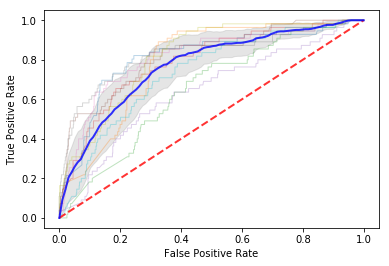

Mean ROC (AUC = 0.77 $\pm$ 0.07)


In [30]:
print(__doc__)

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold


cv = StratifiedKFold(n_splits=10)
classifier = LogisticRegression(solver='liblinear', max_iter=100, 
                             random_state=42,verbose=2,class_weight='balanced')

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, Y):
    probas_ = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print(r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

Each ROC curve will have 11 curves, with the dark blue being the average of the other 10 curves from the 10-fold cross validation. AUC score is also averaged over this 10-fold cross validation. 

For this data set in particular it is important to look at the AUC curve since the data is heavily skewed to one direction. So if the accuracy is 95%, but the AUC is 0.40 it most likely means the model is really good at predicting true negatives, but not so good at predicting true positives. 

## Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(random_state=10)

for train_indices, test_indices in kf.split(X):
    clf_tree.fit(X[train_indices], Y[train_indices])
    print(clf_tree.score(X[test_indices], Y[test_indices]))

0.9600380589914367
0.8810656517602283
0.8591817316841104
0.9638439581351094
0.9590865842055185
0.9743101807802094
0.9495238095238095
0.96
0.9095238095238095
0.819047619047619


In [22]:
print(clf_tree.score(X[train_indices], Y[train_indices]))

0.9773688663282571


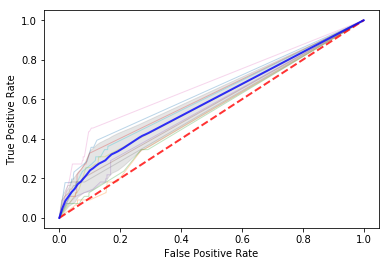

Mean ROC (AUC = 0.59 $\pm$ 0.05)


In [29]:
cv = StratifiedKFold(n_splits=10)
classifier = DecisionTreeClassifier(random_state=10)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, Y):
    probas_ = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print(r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

## Naive Bayes 

In [23]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
clf_NB = GaussianNB()

for train_indices, test_indices in kf.split(X):
    clf_NB.fit(X[train_indices], Y[train_indices])
    print(clf_NB.score(X[test_indices], Y[test_indices]))

0.9828734538534729
0.928639391056137
0.8705994291151284
0.994291151284491
0.9257849666983825
0.9857278782112274
0.9723809523809523
0.9714285714285714
0.9352380952380952
0.8333333333333334


In [24]:
  print(clf_NB.score(X[train_indices], Y[train_indices]))

0.9602368866328257


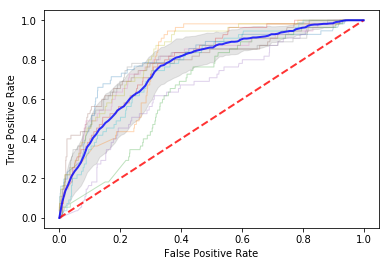

Mean ROC (AUC = 0.77 $\pm$ 0.06)


In [28]:
cv = StratifiedKFold(n_splits=10)
classifier = GaussianNB()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, Y):
    probas_ = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print(r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

## SVM

In [25]:
from sklearn.svm import SVC
clf_SVM = SVC()

for train_indices, test_indices in kf.split(X):
    clf_SVM.fit(X[train_indices], Y[train_indices])
    print(clf_SVM.score(X[test_indices], Y[test_indices]))

0.9838249286393911
0.9257849666983825
0.8715509039010466
0.994291151284491
0.9952426260704091
0.9866793529971456
0.9742857142857143
0.9714285714285714
0.939047619047619
0.8333333333333334


In [26]:
print(clf_SVM.score(X[train_indices], Y[train_indices]))

0.9602368866328257


Automatically created module for IPython interactive environment


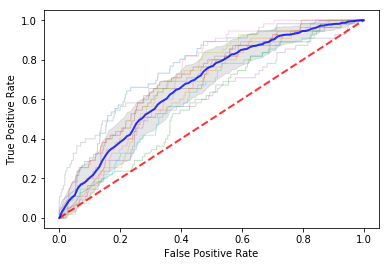

Mean ROC (AUC = 0.68 $\pm$ 0.06)


In [31]:
print(__doc__)

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold


cv = StratifiedKFold(n_splits=10)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=10)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, Y):
    probas_ = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print(r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

## Random Forest 

In [27]:
from sklearn.ensemble import RandomForestClassifier
clf_RM = RandomForestClassifier(n_estimators = 100, criterion='entropy', random_state=0)
for train_indices, test_indices in kf.split(X):
    clf_RM.fit(X[train_indices], Y[train_indices])
    print(clf_RM.score(X[test_indices], Y[test_indices]))

C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.9705042816365367
0.8972407231208372
0.8658420551855376
0.9676498572787822
0.9714557564224549
0.9752616555661275
0.9485714285714286
0.9647619047619047
0.9266666666666666
0.8314285714285714


In [28]:
print(clf_RM.score(X[train_indices], Y[train_indices]))

0.9773688663282571


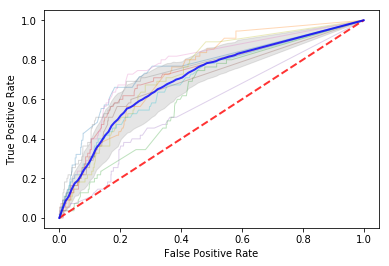

Mean ROC (AUC = 0.71 $\pm$ 0.06)


In [36]:
cv = StratifiedKFold(n_splits=10)
classifier = RandomForestClassifier(n_estimators = 100, criterion='entropy', random_state=0)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, Y):
    probas_ = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print(r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

Feature ranking:
1. feature 4 (0.524265)
2. feature 1 (0.177247)
3. feature 2 (0.175415)
4. feature 0 (0.088704)
5. feature 3 (0.034370)


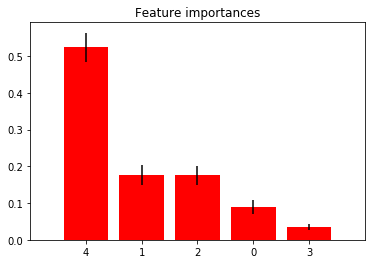


 Lowest scores: [  2.        41.919343 -87.694259   8.         1.      ] [  3.        41.891126 -87.61156    5.         2.      ] [  2.        41.999129 -87.795585   8.         1.      ]


In [35]:

importances = clf_RM.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_RM.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()
col = list(X)
print("\n Lowest scores:", col[10],col[20],col[21])

Based on this feature importance from random forrest models it appears theat feature 4, number of mosquitoes collected in a trap, is very important >50% in the model. However I think this feature may be biased in the model, the more mosquitoes collected in a trap the more likely it is there will be WNV present. I have decided to remove this feature in all further models since it doesn't hold any relavancy in truely predicting WNV. 

## Neural Network

In [14]:
from sklearn import neural_network

nns=neural_network.MLPClassifier(hidden_layer_sizes=(150, ), 
                                 activation='relu', solver='adam', alpha=0.0001, 
                                 batch_size='auto', learning_rate='constant', 
                                 learning_rate_init=0.01, power_t=0.5, max_iter=2000, 
                                 shuffle=True, random_state=None, tol=0.0001, verbose=False, 
                                 warm_start=False, momentum=0.9, nesterovs_momentum=True, 
                                 early_stopping=False, validation_fraction=0.1, beta_1=0.5,
                                 beta_2=0.999, epsilon=1e-08)

for train_indices, test_indices in kf.split(X):
    nns.fit(X[train_indices], Y[train_indices])
    print(nns.score(X[test_indices], Y[test_indices]))

NameError: name 'kf' is not defined

In [30]:
print(nns.score(X[train_indices], Y[train_indices]))

0.9602368866328257


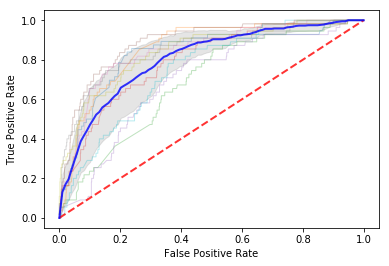

Mean ROC (AUC = 0.80 $\pm$ 0.07)


In [44]:
cv = StratifiedKFold(n_splits=10)
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(150, ), 
                                 activation='relu', solver='adam', alpha=0.0001, 
                                 batch_size='auto', learning_rate='constant', 
                                 learning_rate_init=0.01, power_t=0.5, max_iter=2000, 
                                 shuffle=True, random_state=None, tol=0.0001, verbose=False, 
                                 warm_start=False, momentum=0.9, nesterovs_momentum=True, 
                                 early_stopping=False, validation_fraction=0.1, beta_1=0.5,
                                 beta_2=0.999, epsilon=1e-08)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, Y):
    probas_ = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print(r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

For my initial simple models the accuracy score for most them were above 90%, with AUC scores >70. However as mentioned above I think one of the the features needs to be removed from the models. 

Next, I plan to add in all the weather data and see how the model works with that. I think there will need to be some feature selection to optimize the model. There are a few features that does not have any importance in disease transmission, such as lake depth and water temperature, that may not be helpful in fitting a model. 

# Adding weather data to the models 

In [25]:
train = pd.read_csv('C:/Users/deanm/OneDrive/Documents/University of Idaho/Classes/Fall 2018/STAT 517/west_nile/input/train.csv')
test = pd.read_csv('C:/Users/deanm/OneDrive/Documents/University of Idaho/Classes/Fall 2018/STAT 517/west_nile/input/test.csv')
weather = pd.read_csv('C:/Users/deanm/OneDrive/Documents/University of Idaho/Classes/Fall 2018/STAT 517/west_nile/input/weather.csv')

In [26]:
weather_stn1 = weather[weather['Station']==1]
weather_stn2 = weather[weather['Station']==2]
weather_stn1 = weather_stn1.drop('Station', axis=1)
weather_stn2 = weather_stn2.drop('Station', axis=1)
weather = weather_stn1.merge(weather_stn2, on='Date')

In [27]:
weather = weather.replace('M', -1)
weather = weather.replace('-', -1)
weather = weather.replace('T', -1)
weather = weather.replace(' T', -1)
weather = weather.replace('  T', -1)

In [28]:
def create_month(x):
    return x.split('-')[1]

def create_day(x):
    return x.split('-')[2]

train['month'] = train.Date.apply(create_month)
train['day'] = train.Date.apply(create_day)
test['month'] = test.Date.apply(create_month)
test['day'] = test.Date.apply(create_day)

In [29]:
train['Lat_int'] = train.Latitude.apply(int)
train['Long_int'] = train.Longitude.apply(int)
test['Lat_int'] = test.Latitude.apply(int)
test['Long_int'] = test.Longitude.apply(int)

In [30]:
train = train.drop(['Address', 'AddressNumberAndStreet', 'NumMosquitos'], axis = 1)
test = test.drop(['Id', 'Address', 'AddressNumberAndStreet'], axis = 1)

In [31]:
train = train.merge(weather, on='Date')
test = test.merge(weather, on='Date')


In [32]:
train = train.drop(['Date'], axis = 1)
test = test.drop(['Date'], axis = 1)

In [33]:
from sklearn import ensemble, preprocessing
lbl = preprocessing.LabelEncoder()
lbl.fit(list(train['Species'].values) + list(test['Species'].values))
train['Species'] = lbl.transform(train['Species'].values)
test['Species'] = lbl.transform(test['Species'].values)

lbl.fit(list(train['Street'].values) + list(test['Street'].values))
train['Street'] = lbl.transform(train['Street'].values)
test['Street'] = lbl.transform(test['Street'].values)

lbl.fit(list(train['Trap'].values) + list(test['Trap'].values))
train['Trap'] = lbl.transform(train['Trap'].values)
test['Trap'] = lbl.transform(test['Trap'].values)

In [34]:
train = train.ix[:,(train != -1).any(axis=0)]
test = test.ix[:,(test != -1).any(axis=0)]

C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


NameError: name 'sns' is not defined

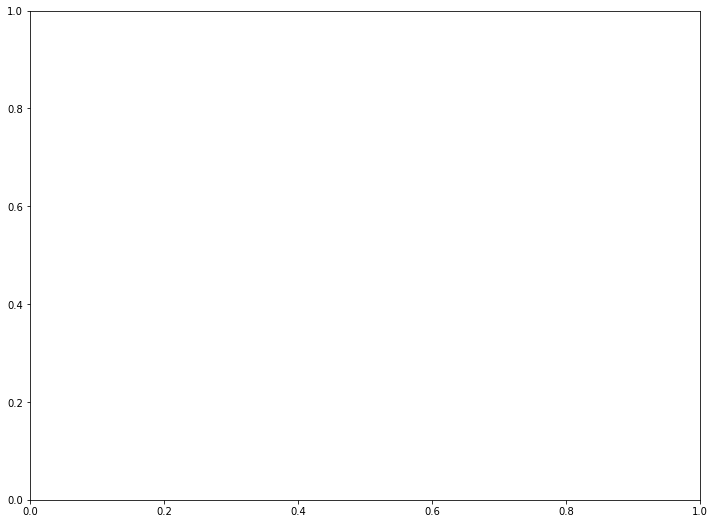

In [13]:
hmap = train.corr()
pl.subplots(figsize=(12, 9))
sns.heatmap(hmap, vmax=.8,annot=True,cmap="BrBG", square=True);

In [23]:
list(train.columns.values)

['Species',
 'Block',
 'Street',
 'Trap',
 'Latitude',
 'Longitude',
 'AddressAccuracy',
 'WnvPresent',
 'month',
 'day',
 'Lat_int',
 'Long_int',
 'Tmax_x',
 'Tmin_x',
 'Tavg_x',
 'Depart_x',
 'DewPoint_x',
 'WetBulb_x',
 'Heat_x',
 'Cool_x',
 'Sunrise_x',
 'Sunset_x',
 'CodeSum_x',
 'Depth_x',
 'SnowFall_x',
 'PrecipTotal_x',
 'StnPressure_x',
 'SeaLevel_x',
 'ResultSpeed_x',
 'ResultDir_x',
 'AvgSpeed_x',
 'Tmax_y',
 'Tmin_y',
 'Tavg_y',
 'DewPoint_y',
 'WetBulb_y',
 'Heat_y',
 'Cool_y',
 'CodeSum_y',
 'PrecipTotal_y',
 'StnPressure_y',
 'SeaLevel_y',
 'ResultSpeed_y',
 'ResultDir_y',
 'AvgSpeed_y']

In [20]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)



for n,v in train.items():
    if v.dtype == "object":
        train[n] = v.factorize()[0]


test = train[['WnvPresent']]
train = train.drop(['WnvPresent'], axis = 1)

X = train.iloc[:,:].values
Y = test.iloc[:,:].values

# Feature Selection

## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf_RM = RandomForestClassifier(n_estimators = 100, criterion='entropy', random_state=0)
for train_indices, test_indices in kf.split(X):
    clf_RM.fit(X[train_indices], Y[train_indices])
    print(clf_RM.score(X[test_indices], Y[test_indices]))

C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9838249286393911


C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9257849666983825


C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.8715509039010466


C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.994291151284491


C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9952426260704091


C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9866793529971456


C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9742857142857143


C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9714285714285714


C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9419047619047619


C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.8333333333333334


In [43]:
print(clf_RM.score(X[train_indices], Y[train_indices]))

0.9831852791878173


Automatically created module for IPython interactive environment


C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vec

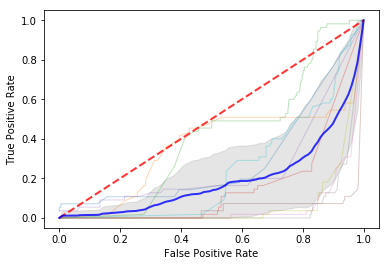

Mean ROC (AUC = 0.19 $\pm$ 0.13)


In [22]:
print(__doc__)

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold


cv = StratifiedKFold(n_splits=10)
classifier = RandomForestClassifier(n_estimators = 100, criterion='entropy', random_state=0)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, Y):
    probas_ = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


print(r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

Feature ranking:
1. feature 0 (0.149209)
2. feature 5 (0.109899)
3. feature 3 (0.106528)
4. feature 4 (0.101055)
5. feature 2 (0.094005)
6. feature 1 (0.082675)
7. feature 7 (0.029198)
8. feature 6 (0.027509)
9. feature 19 (0.022585)
10. feature 20 (0.021180)
11. feature 25 (0.020829)
12. feature 18 (0.019897)
13. feature 43 (0.018959)
14. feature 33 (0.011953)
15. feature 31 (0.010735)
16. feature 15 (0.010704)
17. feature 14 (0.009575)
18. feature 8 (0.009394)
19. feature 29 (0.009330)
20. feature 39 (0.009260)
21. feature 37 (0.008953)
22. feature 40 (0.008713)
23. feature 30 (0.008046)
24. feature 12 (0.007914)
25. feature 13 (0.007879)
26. feature 11 (0.007738)
27. feature 34 (0.007226)
28. feature 41 (0.007060)
29. feature 27 (0.006996)
30. feature 26 (0.006994)
31. feature 16 (0.005877)
32. feature 32 (0.005826)
33. feature 28 (0.005820)
34. feature 42 (0.005702)
35. feature 9 (0.005294)
36. feature 36 (0.005053)
37. feature 21 (0.004749)
38. feature 24 (0.004271)
39. feature 38

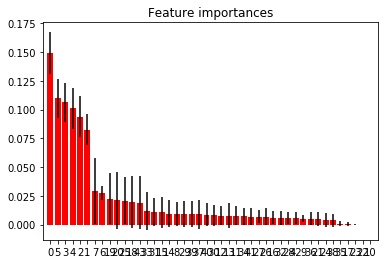


 Lowest scores: [  2.        21.        45.        39.        41.919343 -87.694259
   8.         0.         0.        41.       -87.        88.
  60.         0.         0.        58.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         5.8       18.         0.
  88.        65.         0.        59.         0.         0.
   0.         0.         0.         0.         0.         5.8
  16.         0.      ] [  3.        53.        46.        91.        41.891126 -87.61156
   5.         0.         0.        41.       -87.        88.
  60.         0.         0.        58.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         5.8       18.         0.
  88.        65.         0.        59.         0.         0.
   0.         0.         0.         0.         0.         5.8
  16.         0.      ] [  2.        65.        36.        96.        41.999129 -87.795585
 

In [61]:
importances = clf_RM.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_RM.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()
col = list(X)
print("\n Lowest scores:", col[10],col[20],col[21])

So from this feature importance ranking it appears that the species of mosqiuto is the most important feature, which I hypothesized from the above figures showing that some species did not carry WNV in any of the years in the data set. Next, there are some weather related features such as temperature min and max, along with longitude and latitude. When I optimize the model I will select the top 15 features. 

Let's continue with the current set of features

## Logistic Regression

In [44]:
for train_indices, test_indices in kf.split(X):
    clf_Log.fit(X[train_indices], Y[train_indices])
    print(clf_Log.score(X[test_indices], Y[test_indices]))

C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibLinear]0.8981921979067554
[LibLinear]0.6898192197906755
[LibLinear]0.4719314938154139
[LibLinear]0.45670789724072314
[LibLinear]0.9181731684110371
[LibLinear]0.7411988582302569
[LibLinear]0.6619047619047619
[LibLinear]0.5961904761904762
[LibLinear]0.7790476190476191
[LibLinear]0.4076190476190476


In [45]:
print(clf_Log.score(X[train_indices], Y[train_indices]))

0.705160744500846


Automatically created module for IPython interactive environment
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

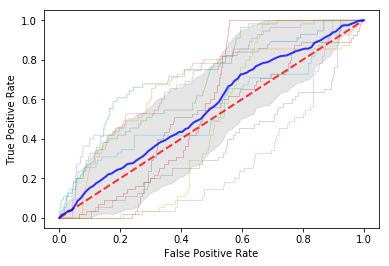

Mean ROC (AUC = 0.56 $\pm$ 0.14)


In [72]:
print(__doc__)

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold


cv = StratifiedKFold(n_splits=10)
classifier = LogisticRegression(solver='liblinear', max_iter=100, 
                             random_state=42,verbose=2,class_weight='balanced')

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, Y):
    probas_ = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


print(r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

## Neural Network

In [46]:
for train_indices, test_indices in kf.split(X):
    nns.fit(X[train_indices], Y[train_indices])
    print(nns.score(X[test_indices], Y[test_indices]))

C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9838249286393911
0.9257849666983825
0.8715509039010466
0.7516650808753568
0.9952426260704091
0.9571836346336822
0.9733333333333334
0.9714285714285714
0.939047619047619
0.8333333333333334


In [47]:
print(nns.score(X[train_indices], Y[train_indices]))

0.9602368866328257


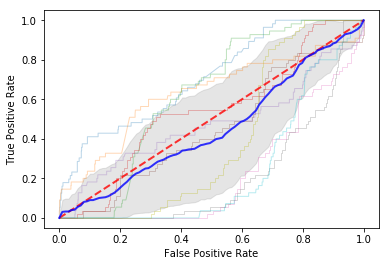

Mean ROC (AUC = 0.45 $\pm$ 0.17)


In [73]:
cv = StratifiedKFold(n_splits=10)
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(150, ), 
                                 activation='relu', solver='adam', alpha=0.0001, 
                                 batch_size='auto', learning_rate='constant', 
                                 learning_rate_init=0.01, power_t=0.5, max_iter=2000, 
                                 shuffle=True, random_state=None, tol=0.0001, verbose=False, 
                                 warm_start=False, momentum=0.9, nesterovs_momentum=True, 
                                 early_stopping=False, validation_fraction=0.1, beta_1=0.5,
                                 beta_2=0.999, epsilon=1e-08)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, Y):
    probas_ = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


print(r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

## D Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(random_state=10)

for train_indices, test_indices in kf.split(X):
    clf_tree.fit(X[train_indices], Y[train_indices])
    print(clf_tree.score(X[test_indices], Y[test_indices]))

0.9647954329210275
0.8953377735490009
0.8068506184586108
0.9134157944814463
0.9952426260704091
0.8877259752616555
0.9371428571428572
0.9161904761904762
0.9238095238095239
0.8019047619047619


In [49]:
print(clf_tree.score(X[train_indices], Y[train_indices]))

0.9831852791878173


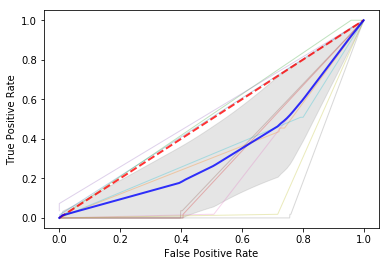

Mean ROC (AUC = 0.34 $\pm$ 0.14)


In [75]:
cv = StratifiedKFold(n_splits=10)
classifier = DecisionTreeClassifier(random_state=10)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, Y):
    probas_ = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print(r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

## Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
clf_NB = GaussianNB()

for train_indices, test_indices in kf.split(X):
    clf_NB.fit(X[train_indices], Y[train_indices])
    print(clf_NB.score(X[test_indices], Y[test_indices]))

0.2702188392007612
0.09990485252140818
0.24643196955280686
0.4871550903901047
0.4015223596574691
0.5071360608943863
0.2276190476190476
0.5876190476190476
0.6447619047619048
0.4361904761904762


In [51]:
print(clf_NB.score(X[train_indices], Y[train_indices]))

0.557741116751269


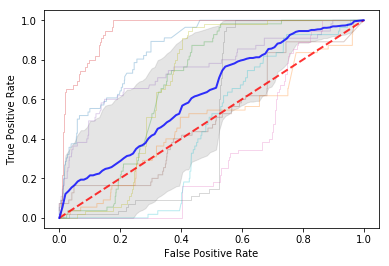

Mean ROC (AUC = 0.62 $\pm$ 0.18)


In [77]:
cv = StratifiedKFold(n_splits=10)
classifier = GaussianNB()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, Y):
    probas_ = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print(r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

## Support Vector Machines

In [19]:
from sklearn.svm import SVC
clf_SVM = SVC()

for train_indices, test_indices in kf.split(X):
    clf_SVM.fit(X[train_indices], Y[train_indices])
    print(clf_SVM.score(X[test_indices], Y[test_indices]))

NameError: name 'kf' is not defined

In [53]:
print(clf_SVM.score(X[train_indices], Y[train_indices]))

0.9677453468697124


C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

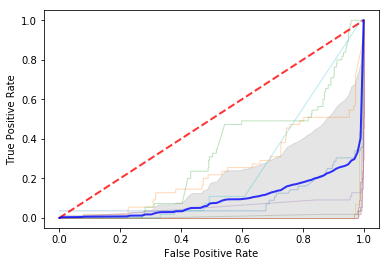

Mean ROC (AUC = 0.10 $\pm$ 0.12)


In [23]:
cv = StratifiedKFold(n_splits=10)
classifier =  svm.SVC(kernel='rbf', probability=True,
                     random_state=10)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, Y):
    probas_ = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print(r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

With all the weather data added to the model all the models have preformed much worse than my simplified model. This may be due to overfitting of the model, so I will use the top 20 features from the random forrest feature selection. 

## Model optimization

In [35]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)



for n,v in train.items():
    if v.dtype == "object":
        train[n] = v.factorize()[0]


test = train[['WnvPresent']]
train = train.drop(['WnvPresent','AddressAccuracy','Lat_int','Long_int','Sunrise_x','Sunset_x','CodeSum_x','CodeSum_y','Heat_x','Heat_y','Cool_x','Cool_y','StnPressure_y','StnPressure_x','SeaLevel_y','SeaLevel_x','DewPoint_x','DewPoint_y','WetBulb_y','WetBulb_x','Tavg_x','Tavg_y','ResultSpeed_y','ResultSpeed_x','ResultDir_y','ResultDir_x'], axis = 1)

X = train.iloc[:,:].values
Y = test.iloc[:,:].values

In [36]:
from sklearn.ensemble import RandomForestClassifier
clf_RM = RandomForestClassifier(n_estimators = 100, criterion='entropy', random_state=0)
for train_indices, test_indices in kf.split(X):
    clf_RM.fit(X[train_indices], Y[train_indices])
    print(clf_RM.score(X[test_indices], Y[test_indices]))

C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9838249286393911


C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9257849666983825


C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.8705994291151284


C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.994291151284491


C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9952426260704091


C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9866793529971456


C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9742857142857143


C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9714285714285714


C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.94


C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.8352380952380952


In [37]:
print(clf_RM.score(X[train_indices], Y[train_indices]))

0.9831852791878173


C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


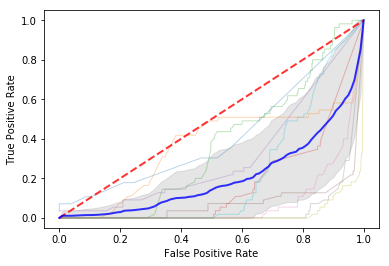

Mean ROC (AUC = 0.21 $\pm$ 0.14)


In [78]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold


cv = StratifiedKFold(n_splits=10)
classifier = RandomForestClassifier(n_estimators = 100, criterion='entropy', random_state=0)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, Y):
    probas_ = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


print(r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

Feature ranking:
1. feature 0 (0.135563)
2. feature 5 (0.115265)
3. feature 3 (0.110013)
4. feature 4 (0.103012)
5. feature 2 (0.096822)
6. feature 1 (0.084450)
7. feature 18 (0.050129)
8. feature 6 (0.048161)
9. feature 7 (0.036738)
10. feature 16 (0.034494)
11. feature 14 (0.031653)
12. feature 9 (0.031196)
13. feature 10 (0.030321)
14. feature 15 (0.028859)
15. feature 8 (0.028219)
16. feature 17 (0.018877)
17. feature 13 (0.016123)
18. feature 12 (0.000104)
19. feature 11 (0.000000)


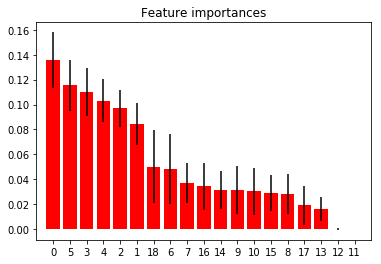


 Lowest scores: [  2.        21.        45.        39.        41.919343 -87.694259
   0.         0.        88.        60.         0.         0.
   0.         0.         0.        88.        65.         0.
   0.      ] [  3.        53.        46.        91.        41.891126 -87.61156
   0.         0.        88.        60.         0.         0.
   0.         0.         0.        88.        65.         0.
   0.      ] [  2.        65.        36.        96.        41.999129 -87.795585
   0.         0.        88.        60.         0.         0.
   0.         0.         0.        88.        65.         0.
   0.      ]


In [18]:
importances = clf_RM.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_RM.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()
col = list(X)
print("\n Lowest scores:", col[10],col[20],col[21])

Species of mosquito is still the most important feature. 

## Logestic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
clf_Log = LogisticRegression(solver='liblinear', max_iter=100, 
                             random_state=42,verbose=2,class_weight='balanced')

for train_indices, test_indices in kf.split(X):
    clf_Log.fit(X[train_indices], Y[train_indices])
    print(clf_Log.score(X[test_indices], Y[test_indices]))

[LibLinear]0.7050428163653664
[LibLinear]0.25118934348239774
[LibLinear]0.44814462416745954
[LibLinear]0.49096098953377737
[LibLinear]0.8553758325404377
[LibLinear]0.5499524262607041
[LibLinear]0.7076190476190476
[LibLinear]0.6838095238095238
[LibLinear]0.9114285714285715
[LibLinear]0.42095238095238097


In [70]:
 print(clf_Log.score(X[train_indices], Y[train_indices]))

0.6253172588832487


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

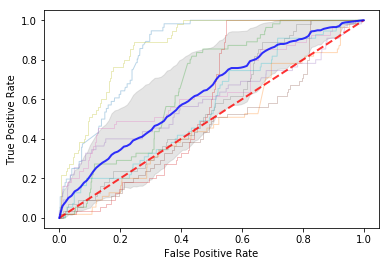

Mean ROC (AUC = 0.63 $\pm$ 0.13)


In [22]:
cv = StratifiedKFold(n_splits=10)
classifier = LogisticRegression(solver='liblinear', max_iter=100, 
                             random_state=42,verbose=2,class_weight='balanced')

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, Y):
    probas_ = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


print(r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

## Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
clf_NB = GaussianNB()

for train_indices, test_indices in kf.split(X):
    clf_NB.fit(X[train_indices], Y[train_indices])
    print(clf_NB.score(X[test_indices], Y[test_indices]))

0.3139866793529971
0.1065651760228354
0.2521408182683159
0.6460513796384396
0.5375832540437678
0.5842055185537584
0.35714285714285715
0.6180952380952381
0.6533333333333333
0.5457142857142857


In [72]:
print(clf_NB.score(X[train_indices], Y[train_indices]))

0.5328891708967851


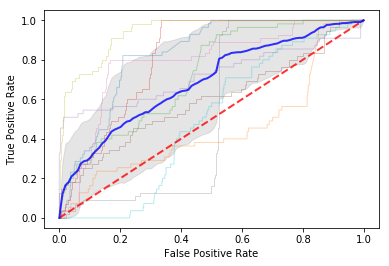

Mean ROC (AUC = 0.69 $\pm$ 0.16)


In [24]:
cv = StratifiedKFold(n_splits=10)
classifier = GaussianNB()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, Y):
    probas_ = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


print(r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

## Neural Network

In [73]:
from sklearn import neural_network

nns=neural_network.MLPClassifier(hidden_layer_sizes=(150, ), 
                                 activation='relu', solver='adam', alpha=0.0001, 
                                 batch_size='auto', learning_rate='constant', 
                                 learning_rate_init=0.01, power_t=0.5, max_iter=2000, 
                                 shuffle=True, random_state=None, tol=0.0001, verbose=False, 
                                 warm_start=False, momentum=0.9, nesterovs_momentum=True, 
                                 early_stopping=False, validation_fraction=0.1, beta_1=0.5,
                                 beta_2=0.999, epsilon=1e-08)

for train_indices, test_indices in kf.split(X):
    nns.fit(X[train_indices], Y[train_indices])
    print(nns.score(X[test_indices], Y[test_indices]))

0.9838249286393911
0.9257849666983825
0.8715509039010466
0.994291151284491
0.9952426260704091
0.9276879162702188
0.9638095238095238
0.9714285714285714
0.939047619047619
0.8333333333333334


In [74]:
print(nns.score(X[train_indices], Y[train_indices]))

0.9602368866328257


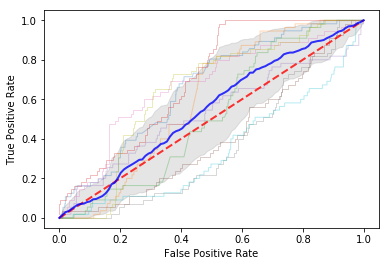

Mean ROC (AUC = 0.54 $\pm$ 0.13)


In [26]:
cv = StratifiedKFold(n_splits=10)
classifier =  neural_network.MLPClassifier(hidden_layer_sizes=(150, ), 
                                 activation='relu', solver='adam', alpha=0.0001, 
                                 batch_size='auto', learning_rate='constant', 
                                 learning_rate_init=0.01, power_t=0.5, max_iter=2000, 
                                 shuffle=True, random_state=None, tol=0.0001, verbose=False, 
                                 warm_start=False, momentum=0.9, nesterovs_momentum=True, 
                                 early_stopping=False, validation_fraction=0.1, beta_1=0.5,
                                 beta_2=0.999, epsilon=1e-08)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, Y):
    probas_ = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


print(r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

## SVM

In [38]:
from sklearn.svm import SVC
clf_SVM = svm.SVC(kernel='rbf', probability=True,
                     random_state=10)

for train_indices, test_indices in kf.split(X):
    clf_SVM.fit(X[train_indices], Y[train_indices])
    print(clf_SVM.score(X[test_indices], Y[test_indices]))

C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9838249286393911


C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9257849666983825


C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8715509039010466


C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.994291151284491


C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9952426260704091


C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9866793529971456


C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9742857142857143


C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9714285714285714


C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.939047619047619


C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8333333333333334


In [ ]:
cv = StratifiedKFold(n_splits=10)
classifier =  svm.SVC(kernel='linear', probability=True,
                     random_state=10)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, Y):
    probas_ = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print(r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

## DT

In [75]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(random_state=10)

for train_indices, test_indices in kf.split(X):
    clf_tree.fit(X[train_indices], Y[train_indices])
    print(clf_tree.score(X[test_indices], Y[test_indices]))

0.9628924833491912
0.9143672692673644
0.840152235965747
0.9086584205518554
0.9952426260704091
0.9533777354900095
0.9085714285714286
0.9238095238095239
0.9276190476190476
0.7904761904761904


In [76]:
print(clf_tree.score(X[train_indices], Y[train_indices]))

0.9831852791878173


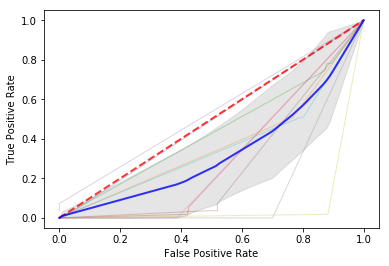

Mean ROC (AUC = 0.33 $\pm$ 0.14)


In [79]:
cv = StratifiedKFold(n_splits=10)
classifier =  DecisionTreeClassifier(random_state=10)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, Y):
    probas_ = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print(r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

Overall the models have preformed better, higher accuracy scores and higher AUC scores, when the number of features are reduced to the top 20 features. Now I will use logestic regression model, highest AUC score, to build maps predicting the location of outbreaks. 

## Predicting unknowns

In [1]:
import pandas as pd
import numpy as np
from sklearn import ensemble, preprocessing

train = pd.read_csv('C:/Users/deanm/OneDrive/Documents/University of Idaho/Classes/Fall 2018/STAT 517/west_nile/input/train.csv')
test = pd.read_csv('C:/Users/deanm/OneDrive/Documents/University of Idaho/Classes/Fall 2018/STAT 517/west_nile/input/test.csv')
weather = pd.read_csv('C:/Users/deanm/OneDrive/Documents/University of Idaho/Classes/Fall 2018/STAT 517/west_nile/input/weather.csv')

C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
labels = train.WnvPresent.values

weather = weather.drop('CodeSum', axis=1)

weather_stn1 = weather[weather['Station']==1]
weather_stn2 = weather[weather['Station']==2]
weather_stn1 = weather_stn1.drop('Station', axis=1)
weather_stn2 = weather_stn2.drop('Station', axis=1)
weather = weather_stn1.merge(weather_stn2, on='Date')

In [3]:
weather = weather.replace('M', -1)
weather = weather.replace('-', -1)
weather = weather.replace('T', -1)
weather = weather.replace(' T', -1)
weather = weather.replace('  T', -1)

In [4]:
def create_month(x):
    return x.split('-')[1]

def create_day(x):
    return x.split('-')[2]

train['month'] = train.Date.apply(create_month)
train['day'] = train.Date.apply(create_day)
test['month'] = test.Date.apply(create_month)
test['day'] = test.Date.apply(create_day)

In [5]:
train['Lat_int'] = train.Latitude.apply(int)
train['Long_int'] = train.Longitude.apply(int)
test['Lat_int'] = test.Latitude.apply(int)
test['Long_int'] = test.Longitude.apply(int)

In [6]:
train = train.merge(weather, on='Date')
test = test.merge(weather, on='Date')

In [7]:
lbl = preprocessing.LabelEncoder()
lbl.fit(list(train['Species'].values) + list(test['Species'].values))
train['Species'] = lbl.transform(train['Species'].values)
test['Species'] = lbl.transform(test['Species'].values)

lbl.fit(list(train['Street'].values) + list(test['Street'].values))
train['Street'] = lbl.transform(train['Street'].values)
test['Street'] = lbl.transform(test['Street'].values)

lbl.fit(list(train['Trap'].values) + list(test['Trap'].values))
train['Trap'] = lbl.transform(train['Trap'].values)
test['Trap'] = lbl.transform(test['Trap'].values)

In [8]:
train = train.ix[:,(train != -1).any(axis=0)]
test = test.ix[:,(test != -1).any(axis=0)]

C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [10]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)



for n,v in train.items():
    if v.dtype == "object":
        train[n] = v.factorize()[0]


test1 = train[['WnvPresent']]
train = train.drop(['WnvPresent','AddressAccuracy','Lat_int','Long_int','Sunrise_x','Sunset_x','Heat_x','Heat_y','Cool_x','Cool_y','StnPressure_y','StnPressure_x','SeaLevel_y','SeaLevel_x','DewPoint_x','DewPoint_y','WetBulb_y','WetBulb_x','Tavg_x','Tavg_y','ResultSpeed_y','ResultSpeed_x','ResultDir_y','ResultDir_x'], axis = 1)

X = train.iloc[:,:].values
Y = test1.iloc[:,:].values

In [11]:
X = train.iloc[:,:].values
Y = test1.iloc[:,:].values

In [12]:
from sklearn.linear_model import LogisticRegression
clf_Log = LogisticRegression(solver='liblinear', max_iter=100, 
                             random_state=10,verbose=2,class_weight='balanced')

for train_indices, test_indices in kf.split(X):
    clf_Log.fit(X[train_indices], Y[train_indices])
    print(clf_Log.score(X[test_indices], Y[test_indices]))

C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibLinear]0.8829686013320647
[LibLinear]0.6279733587059942
[LibLinear]0.6527117031398668
[LibLinear]0.7078972407231209
[LibLinear]0.8877259752616555
[LibLinear]0.8392007611798288
[LibLinear]0.799047619047619
[LibLinear]0.7228571428571429
[LibLinear]0.7904761904761904
[LibLinear]0.4228571428571429


In [30]:

test = test.drop(['AddressAccuracy','Lat_int','Long_int','Sunrise_x','Sunset_x','Heat_x','Heat_y','Cool_x','Cool_y','StnPressure_y','StnPressure_x','SeaLevel_y','SeaLevel_x','DewPoint_x','DewPoint_y','WetBulb_y','WetBulb_x','Tavg_x','Tavg_y','ResultSpeed_y','ResultSpeed_x','ResultDir_y','ResultDir_x'], axis = 1)

KeyError: "['Lat_int' 'Long_int' 'Sunrise_x' 'Sunset_x' 'Heat_x' 'Heat_y' 'Cool_x'\n 'Cool_y' 'StnPressure_y' 'StnPressure_x' 'SeaLevel_y' 'SeaLevel_x'\n 'DewPoint_x' 'DewPoint_y' 'WetBulb_y' 'WetBulb_x' 'Tavg_x' 'Tavg_y'\n 'ResultSpeed_y' 'ResultSpeed_x' 'ResultDir_y' 'ResultDir_x'] not found in axis"

In [15]:
for n,v in test.items():
    if v.dtype == "object":
        test[n] = v.factorize()[0]

In [16]:
Y2 = test.iloc[:,:].values

In [17]:
results=clf_Log.predict(Y2)

In [18]:
results = pd.DataFrame(results)

In [19]:
my_columns = ["result"]
results.columns = my_columns

In [31]:
results

result
0            1
1            1
2            1
3            1
4            1
5            1
6            1
7            1
8            1
9            1
10           1
11           1
12           1
13           1
14           1
15           1
16           1
17           1
18           1
19           1
20           1
21           1
22           1
23           1
24           1
25           1
26           1
27           1
28           1
29           1
...        ...
116263       1
116264       1
116265       1
116266       1
116267       1
116268       1
116269       1
116270       1
116271       1
116272       1
116273       1
116274       1
116275       1
116276       1
116277       1
116278       1
116279       1
116280       1
116281       1
116282       1
116283       1
116284       1
116285       1
116286       1
116287       1
116288       1
116289       1
116290       1
116291       1
116292       1

[116293 rows x 1 columns]

In [32]:
test = pd.read_csv('C:/Users/deanm/OneDrive/Documents/University of Idaho/Classes/Fall 2018/STAT 517/west_nile/input/test.csv')

In [33]:
df_out = pd.merge(test,results,how = 'left',left_index = True, right_index = True)


In [34]:
df_out.to_csv('results.csv')

In [35]:
traps = pd.read_csv('C:/Users/deanm/Documents/University of Idaho/Classes/Fall 2018/STAT 517/results.csv', parse_dates=['Date'])[['Date', 'Trap','Longitude', 'Latitude', 'result', 'Species']]
species = pd.np.unique(traps['Species'])
mapdata = np.loadtxt("C:\Users\deanm\OneDrive\Documents\University of Idaho\Classes\Fall 2018\STAT 517\west_nile\input\mapdata_copyright_openstreetmap_contributors.txt")

In [36]:
traps

Date   Trap  Longitude   Latitude  result                 Species
0      2008-06-11   T002 -87.800991  41.954690       1  CULEX PIPIENS/RESTUANS
1      2008-06-11   T002 -87.800991  41.954690       1          CULEX RESTUANS
2      2008-06-11   T002 -87.800991  41.954690       1           CULEX PIPIENS
3      2008-06-11   T002 -87.800991  41.954690       1        CULEX SALINARIUS
4      2008-06-11   T002 -87.800991  41.954690       1         CULEX TERRITANS
5      2008-06-11   T002 -87.800991  41.954690       1          CULEX TARSALIS
6      2008-06-11   T002 -87.800991  41.954690       1       UNSPECIFIED CULEX
7      2008-06-11   T002 -87.800991  41.954690       1         CULEX ERRATICUS
8      2008-06-11   T007 -87.769279  41.994991       1  CULEX PIPIENS/RESTUANS
9      2008-06-11   T007 -87.769279  41.994991       1          CULEX RESTUANS
10     2008-06-11   T007 -87.769279  41.994991       1           CULEX PIPIENS
11     2008-06-11   T007 -87.769279  41.994991       1        CULEX SALINARIUS
12     2008-06-11   T007 -87.769279  41.994991       1         CULEX TERRITANS
13     2008-06-11   T007 -87.769279  41.994991       1          CULEX TARSALIS
14     2008-06-11   T007 -87.769279  41.994991       1       UNSPECIFIED CULEX
15     2008-06-11   T007 -87.769279  41.994991       1         CULEX ERRATICUS
16     2008-06-11   T015 -87.824812  41.974089       1  CULEX PIPIENS/RESTUANS
17     2008-06-11   T015 -87.824812  41.974089       1          CULEX RESTUANS
18     2008-06-11   T015 -87.824812  41.974089       1           CULEX PIPIENS
19     2008-06-11   T015 -87.824812  41.974089       1        CULEX SALINARIUS
20     2008-06-11   T015 -87.824812  41.974089       1         CULEX TERRITANS
21     2008-06-11   T015 -87.824812  41.974089       1          CULEX TARSALIS
22     2008-06-11   T015 -87.824812  41.974089       1       UNSPECIFIED CULEX
23     2008-06-11   T015 -87.824812  41.974089       1         CULEX ERRATICUS
24     2008-06-11   T045 -87.666455  41.921600       1  CULEX PIPIENS/RESTUANS
25     2008-06-11   T045 -87.666455  41.921600       1          CULEX RESTUANS
26     2008-06-11   T045 -87.666455  41.921600       1           CULEX PIPIENS
27     2008-06-11   T045 -87.666455  41.921600       1        CULEX SALINARIUS
28     2008-06-11   T045 -87.666455  41.921600       1         CULEX TERRITANS
29     2008-06-11   T045 -87.666455  41.921600       1          CULEX TARSALIS
...           ...    ...        ...        ...     ...                     ...
116263 2014-10-02   T238 -87.707394  41.753391       1           CULEX PIPIENS
116264 2014-10-02   T238 -87.707394  41.753391       1        CULEX SALINARIUS
116265 2014-10-02   T238 -87.707394  41.753391       1         CULEX TERRITANS
116266 2014-10-02   T238 -87.707394  41.753391       1          CULEX TARSALIS
116267 2014-10-02   T238 -87.707394  41.753391       1       UNSPECIFIED CULEX
116268 2014-10-02   T238 -87.707394  41.753391       1         CULEX ERRATICUS
116269 2014-10-02  T065A -87.749149  41.777689       1  CULEX PIPIENS/RESTUANS
116270 2014-10-02  T065A -87.749149  41.777689       1          CULEX RESTUANS
116271 2014-10-02  T065A -87.749149  41.777689       1           CULEX PIPIENS
116272 2014-10-02  T065A -87.749149  41.777689       1        CULEX SALINARIUS
116273 2014-10-02  T065A -87.749149  41.777689       1         CULEX TERRITANS
116274 2014-10-02  T065A -87.749149  41.777689       1          CULEX TARSALIS
116275 2014-10-02  T065A -87.749149  41.777689       1       UNSPECIFIED CULEX
116276 2014-10-02  T065A -87.749149  41.777689       1         CULEX ERRATICUS
116277 2014-10-02  T094B -87.669539  41.719140       1  CULEX PIPIENS/RESTUANS
116278 2014-10-02  T094B -87.669539  41.719140       1          CULEX RESTUANS
116279 2014-10-02  T094B -87.669539  41.719140       1           CULEX PIPIENS
116280 2014-10-02  T094B -87.669539  41.719140       1        CULEX SALINARIUS
116281 2014-10-02  T094B -87.669539  41.719140       1         

C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


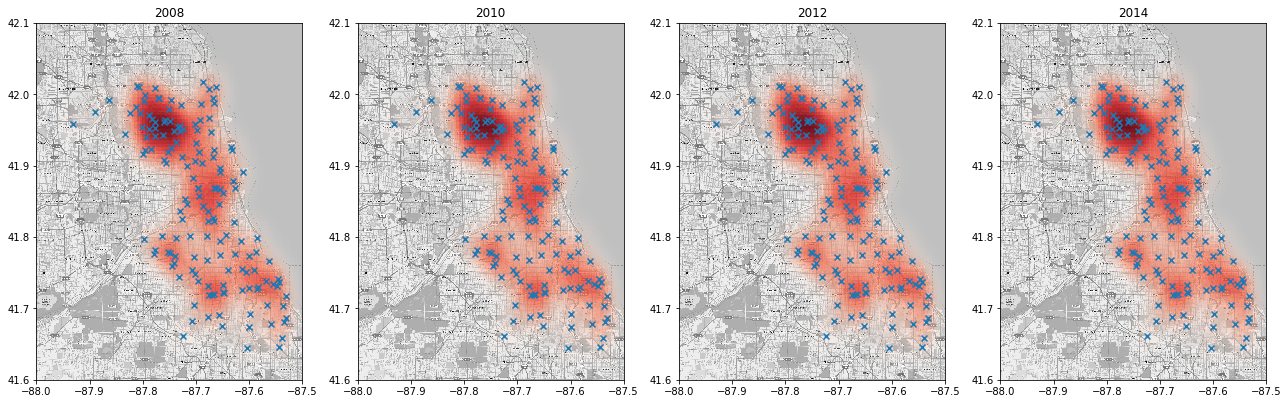

In [38]:
import matplotlib.pyplot as pl
from sklearn.neighbors import KernelDensity
from __future__ import print_function
import datetime
from sklearn.cross_validation import train_test_split
import csv
from sklearn import metrics
from sklearn.utils import shuffle

alpha_cm = pl.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

pl.figure(figsize=(18,6))
for year, subplot in zip([2008, 2010, 2012, 2014], [141, 142, 143, 144]):
    sightings = traps[(traps['result'] > 0) & (traps['Date'].apply(lambda x: x.year) == year)]
    sightings = sightings.groupby(['Date', 'Trap','Longitude', 'Latitude']).max()['result'].reset_index()
    X = sightings[['Longitude', 'Latitude']].values
    kd = KernelDensity(bandwidth=0.02)
    kd.fit(X)

    xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
    gridpoints = np.array([xv.ravel(),yv.ravel()]).T
    zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
    pl.subplot(subplot)
    pl.gca().set_title(year)
    pl.imshow(mapdata, 
               cmap=pl.get_cmap('gray'), 
               extent=lon_lat_box, 
               aspect=aspect)
    pl.imshow(zv, 
               origin='lower', 
               cmap=alpha_cm, 
               extent=lon_lat_box, 
               aspect=aspect)
    pl.tight_layout()
    locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
    pl.scatter(locations[:,0], locations[:,1], marker='x')

pl.savefig('heatmapresult.png')

These maps do not appear to be ideal. All the years have been predicted to be outbreak years with the same amount of WNV present in each year. Lets break the maps into species and see if that helps with our understanding of what is going on. 

         [1]:2008 (CULEX ERRATICUS)
         [2]:2010 (CULEX ERRATICUS)
         [3]:2012 (CULEX ERRATICUS)
         [4]:2014 (CULEX ERRATICUS)
         [5]:2008 (CULEX PIPIENS)
         [6]:2010 (CULEX PIPIENS)
         [7]:2012 (CULEX PIPIENS)
         [8]:2014 (CULEX PIPIENS)
         [9]:2008 (CULEX PIPIENS/RESTUANS)
         [10]:2010 (CULEX PIPIENS/RESTUANS)
         [11]:2012 (CULEX PIPIENS/RESTUANS)
         [12]:2014 (CULEX PIPIENS/RESTUANS)
         [13]:2008 (CULEX RESTUANS)
         [14]:2010 (CULEX RESTUANS)
         [15]:2012 (CULEX RESTUANS)
         [16]:2014 (CULEX RESTUANS)
         [17]:2008 (CULEX SALINARIUS)
         [18]:2010 (CULEX SALINARIUS)
         [19]:2012 (CULEX SALINARIUS)
         [20]:2014 (CULEX SALINARIUS)
         [21]:2008 (CULEX TARSALIS)
         [22]:2010 (CULEX TARSALIS)
         [23]:2012 (CULEX TARSALIS)
         [24]:2014 (CULEX TARSALIS)
         [25]:2008 (CULEX TERRITANS)
         [26]:2010 (CULEX TERRITANS)
         [27]:2012 (CULEX TERRI

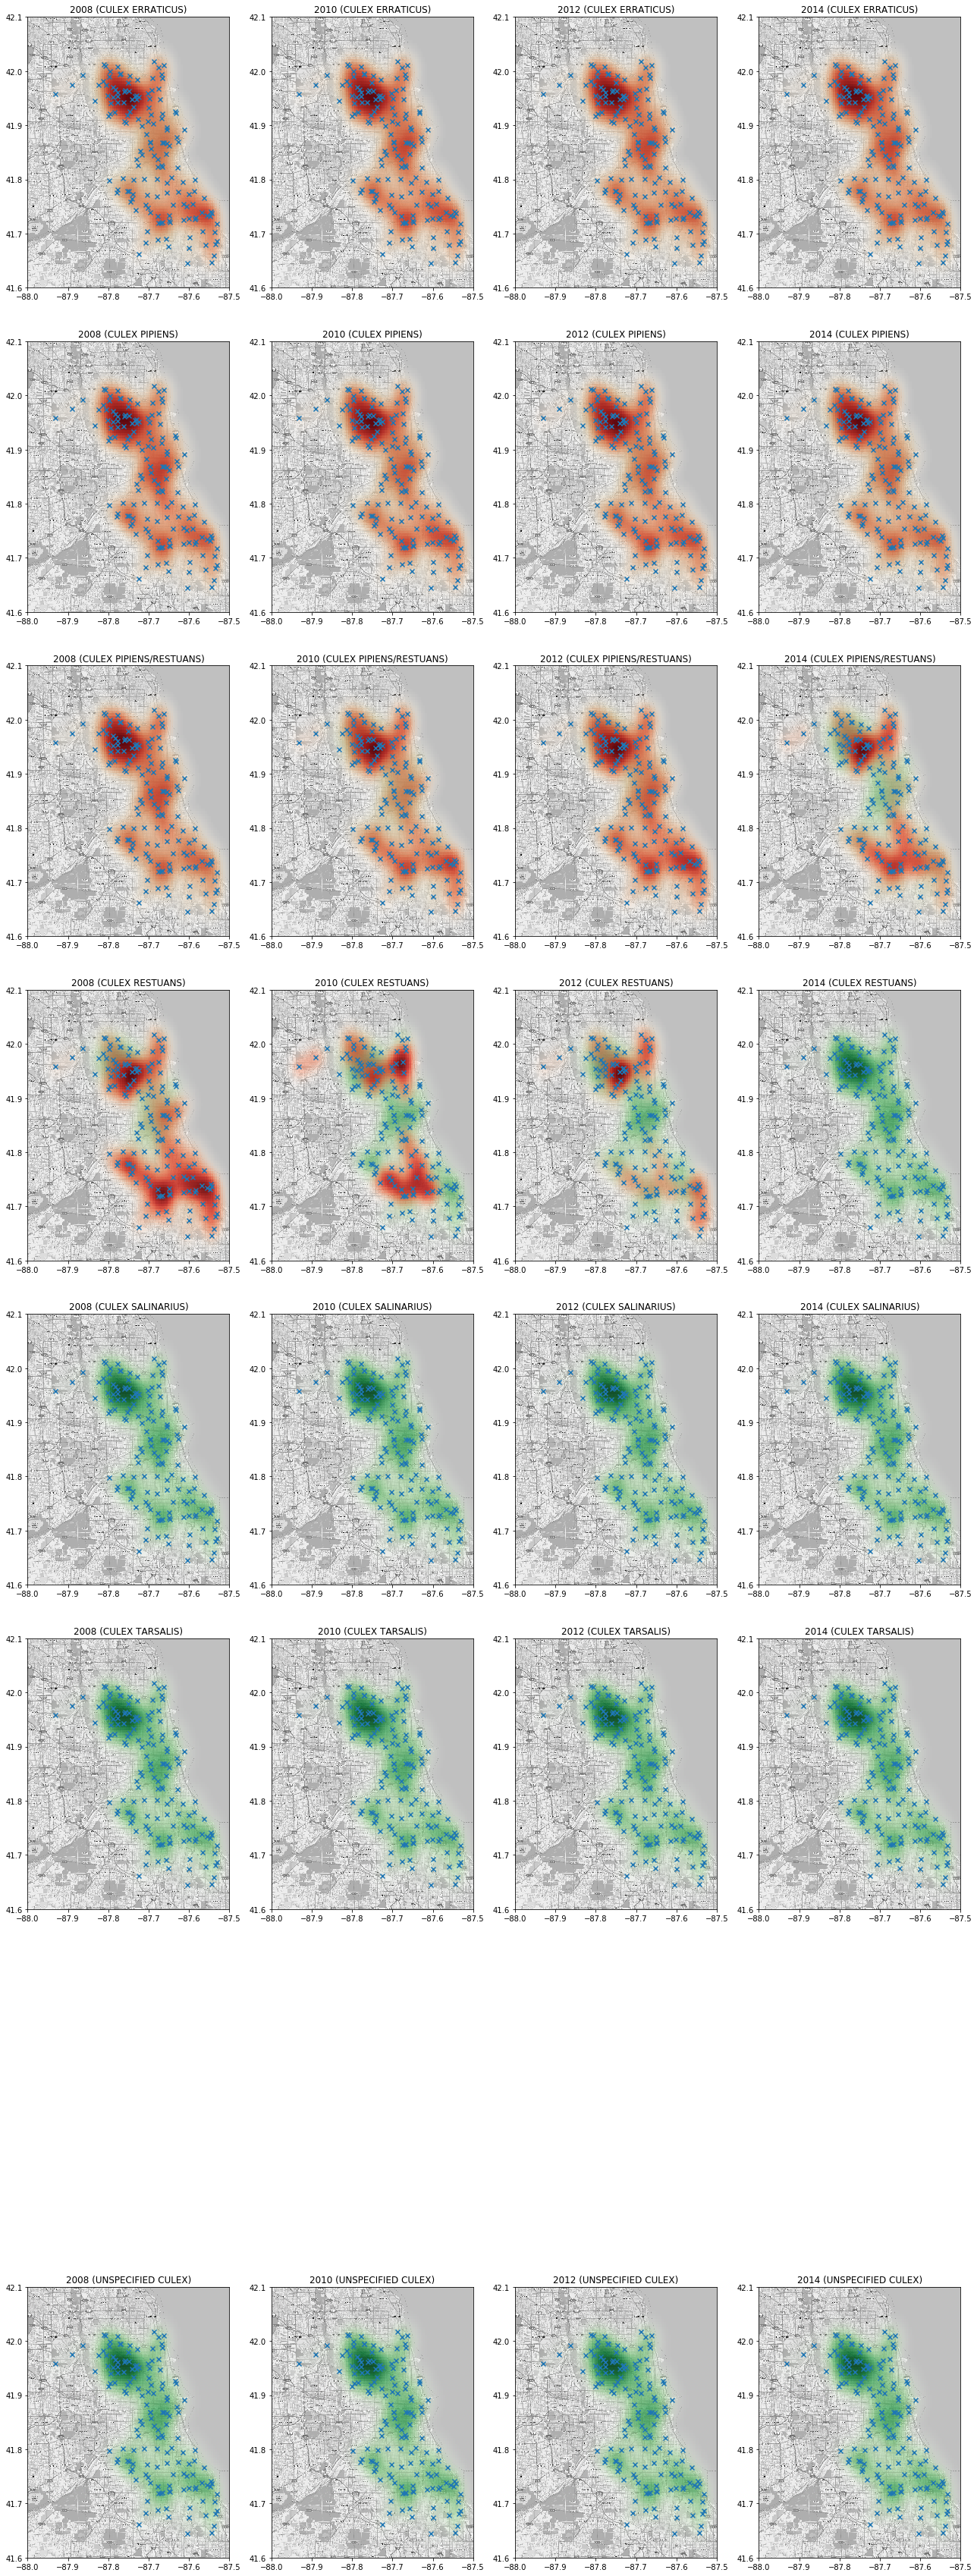

In [13]:
alpha_cm = pl.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
alpha_mcm = pl.cm.Greens
alpha_mcm._init()
alpha_mcm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

subplot = 0
numSpcs = len(species)
pl.figure(figsize=(18,6*numSpcs))
for spcsIndx in range(numSpcs):
    for year in [2008, 2010, 2012, 2014]:
        subplot += 1
        sightings = traps[(traps['Species'] == species[spcsIndx])
                          & (traps['result'] > 0)
                          & (traps['Date'].apply(lambda x: x.year) == year)]
        sightings = sightings.groupby(['Date', 'Trap', 'Longitude', 'Latitude', 'Species']).max()['result'].reset_index()
        mSightings = traps[(traps['Species'] == species[spcsIndx])
                          & (traps['Date'].apply(lambda x: x.year) == year)]
        mSightings = mSightings.groupby(['Date', 'Trap', 'Longitude', 'Latitude', 'Species']).max()['result'].reset_index()
        if(len(mSightings) <= 0):
            print("SKIPPING [" + str(subplot) + "]:" + str(year) + " (" + species[spcsIndx] + ")\t\tNo sightings")
            continue

        mX = mSightings[['Longitude', 'Latitude']].values
        mkd = KernelDensity(bandwidth=0.02)
        mkd.fit(mX)
        mxv,myv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
        mGridpoints = np.array([mxv.ravel(),myv.ravel()]).T
        mzv = np.exp(mkd.score_samples(mGridpoints).reshape(100,100))

        pl.subplot(numSpcs, 4, subplot)
        pl.gca().set_title(str(year) + " (" + species[spcsIndx] + ")")
        pl.imshow(mapdata, 
                   cmap=pl.get_cmap('gray'), 
                   extent=lon_lat_box, 
                   aspect=aspect)
        pl.imshow(mzv, 
                   origin='lower', 
                   cmap=alpha_mcm, 
                   extent=lon_lat_box, 
                   aspect=aspect)
        if(len(sightings) > 0):
            X = sightings[['Longitude', 'Latitude']].values
            kd = KernelDensity(bandwidth=0.02)
            kd.fit(X)
            xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
            gridpoints = np.array([xv.ravel(),yv.ravel()]).T
            zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
            pl.imshow(zv, 
                       origin='lower', 
                       cmap=alpha_cm, 
                       extent=lon_lat_box, 
                       aspect=aspect)
        print("         [" + str(subplot) + "]:" + str(year) + " (" + species[spcsIndx] + ")")
        pl.tight_layout()
        locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
        pl.scatter(locations[:,0], locations[:,1], marker='x')

pl.savefig('heatmap.png')

It appears that th emodel has predicted that Culex erraticus will be a carrier of WNV, even though it was not a carrier of WNV in the training years. This is an interesting result, I think further work would need to be done to fix this issue. 

All other species of mosquitoes that did not carry WNV in the training set, were predicted to not carry WNV in the test set, which is interesting that these species were predicted correctly. 

The Culex pippiens mosquito has the best looking map of outbreaks, with some years having more west nile than others. This model looks much more like the test data set. 

I would also like to state that I'm surprised a guassian model did so poorly, since epidemiologists use models that have a guessian distribution to predict disease and population growth. I would have thought this model would have preformed well since it is the standard model distribution in the field. 

Overall, I think more work would need to be done to properlly predict the outbreaks of WNV. 

# Cluster analysis

Now I plan to analyze the data with clustering. Lets see if there are clusters of dates where WNV could be present. For this part of the analysis I will be dropping the WNV present column from all data, since clustering is usually thought of as a unsupervised learning techinque. 

In [10]:
train = pd.read_csv('C:/Users/deanm/OneDrive/Documents/University of Idaho/Classes/Fall 2018/STAT 517/west_nile/input/train.csv')
test = pd.read_csv('C:/Users/deanm/OneDrive/Documents/University of Idaho/Classes/Fall 2018/STAT 517/west_nile/input/test.csv')
weather = pd.read_csv('C:/Users/deanm/OneDrive/Documents/University of Idaho/Classes/Fall 2018/STAT 517/west_nile/input/weather.csv')


labels = train.WnvPresent.values


weather = weather.drop('CodeSum', axis=1)


weather_stn1 = weather[weather['Station']==1]
weather_stn2 = weather[weather['Station']==2]
weather_stn1 = weather_stn1.drop('Station', axis=1)
weather_stn2 = weather_stn2.drop('Station', axis=1)
weather = weather_stn1.merge(weather_stn2, on='Date')


weather = weather.replace('M', -1)
weather = weather.replace('-', -1)
weather = weather.replace('T', -1)
weather = weather.replace(' T', -1)
weather = weather.replace('  T', -1)


def create_month(x):
    return x.split('-')[1]

def create_day(x):
    return x.split('-')[2]

train['month'] = train.Date.apply(create_month)
train['day'] = train.Date.apply(create_day)
test['month'] = test.Date.apply(create_month)
test['day'] = test.Date.apply(create_day)

train['Lat_int'] = train.Latitude.apply(int)
train['Long_int'] = train.Longitude.apply(int)
test['Lat_int'] = test.Latitude.apply(int)
test['Long_int'] = test.Longitude.apply(int)

train = train.drop(['Address', 'AddressNumberAndStreet','WnvPresent', 'NumMosquitos'], axis = 1)
test = test.drop(['Id', 'Address', 'AddressNumberAndStreet'], axis = 1)

train = train.merge(weather, on='Date')
test = test.merge(weather, on='Date')
train = train.drop(['Date'], axis = 1)
test = test.drop(['Date'], axis = 1)

lbl = preprocessing.LabelEncoder()
lbl.fit(list(train['Species'].values) + list(test['Species'].values))
train['Species'] = lbl.transform(train['Species'].values)
test['Species'] = lbl.transform(test['Species'].values)

lbl.fit(list(train['Street'].values) + list(test['Street'].values))
train['Street'] = lbl.transform(train['Street'].values)
test['Street'] = lbl.transform(test['Street'].values)

lbl.fit(list(train['Trap'].values) + list(test['Trap'].values))
train['Trap'] = lbl.transform(train['Trap'].values)
test['Trap'] = lbl.transform(test['Trap'].values)

train = train.ix[:,(train != -1).any(axis=0)]
test = test.ix[:,(test != -1).any(axis=0)]


C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:63: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:64: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [11]:
from sklearn import preprocessing
import numpy as np
X_scaled = preprocessing.scale(test)

X_scaled

array([[-0.64920977, -0.00527255, -0.81593499, ...,  1.12634419,
        -0.03993339,  0.94414545],
       [-0.21112813, -0.00527255, -0.81593499, ...,  1.12634419,
        -0.03993339,  0.94414545],
       [-1.08729142, -0.00527255, -0.81593499, ...,  1.12634419,
        -0.03993339,  0.94414545],
       ...,
       [ 0.66503516, -0.80962834, -1.26951524, ...,  0.36586998,
        -0.14007513, -0.05781679],
       [ 1.54119844, -0.80962834, -1.26951524, ...,  0.36586998,
        -0.14007513, -0.05781679],
       [-1.52537306, -0.80962834, -1.26951524, ...,  0.36586998,
        -0.14007513, -0.05781679]])

I would like to reduce the dimensions of the data before continuing with clustering. 

In [12]:
import numpy as np
from sklearn.decomposition import PCA
X = X_scaled
pca = PCA(n_components=2)
pca.fit(X)
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
print(pca.explained_variance_ratio_)  

print(pca.singular_values_)  


[0.3434767 0.1110375]
[1264.02429517  718.69002161]


In [13]:
X_pca = pca.transform(X)

In [14]:
projected = pca.fit_transform(X)
print(X)
print(projected.shape)

[[-0.64920977 -0.00527255 -0.81593499 ...  1.12634419 -0.03993339
   0.94414545]
 [-0.21112813 -0.00527255 -0.81593499 ...  1.12634419 -0.03993339
   0.94414545]
 [-1.08729142 -0.00527255 -0.81593499 ...  1.12634419 -0.03993339
   0.94414545]
 ...
 [ 0.66503516 -0.80962834 -1.26951524 ...  0.36586998 -0.14007513
  -0.05781679]
 [ 1.54119844 -0.80962834 -1.26951524 ...  0.36586998 -0.14007513
  -0.05781679]
 [-1.52537306 -0.80962834 -1.26951524 ...  0.36586998 -0.14007513
  -0.05781679]]
(116293L, 2L)


Checking to make sure we still have all our rows, and we do. 


## K-Means

First, I have choosen to do a kmeans cluster. This is one of the simpler types of clustering, it bases the groups off of samilarity in the features. The algorithm will optimize the centroid for the clusters, giving us our groups. 

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters=2)

kmeans.fit(X_pca)

print(kmeans.cluster_centers_)

y_km = kmeans.fit_predict(X_pca)

[[-2.50384839  0.13657815]
 [ 3.77875978 -0.20612111]]


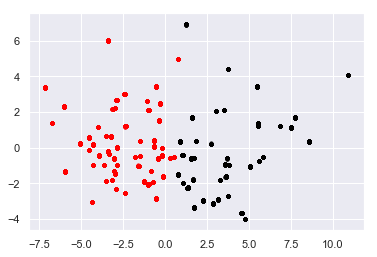

In [17]:
pl.scatter(X_pca[y_km ==0,0], X_pca[y_km == 0,1], s=10, c='red')
pl.scatter(X_pca[y_km ==1,0], X_pca[y_km == 1,1], s=10, c='black')

I'm not sure why I've lost many of my data points in this figure. I confirmed above that we have not lost any rows of data. I've tried other coding to plot more of the points but they do not seem to be working. 

It does appear that when we have two clsuters defined that the data does fall nicely into two groups, WNV present and not present. This could indicate that there are days that have the right conditions versus other days do not have conditions for the virus. Lets move onto another type of clustering

## H. Clustering

Heirarchacal clustering working by spliting clusters based on dissimilarity between two sets. Most often the dissimilarity is determined by euclidean distance, but any form of matrix disctance can be used. 

In [ ]:
#Caused computer to crash 
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

linked = linkage(X_pca, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

Was unable to run the above code without having my computer crash, tried multiple times. 

# Gausian Model based clustering

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Fun

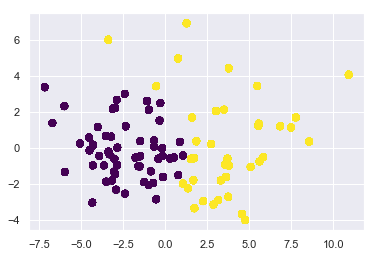

In [21]:
from sklearn.mixture import GMM
gmm = GMM(n_components=2).fit(X_pca)
labels = gmm.predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=40, cmap='viridis');

Again, I'm not sucre why I'm losing so many points in these figures, this is clearly not 100K data points. 

C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Fun

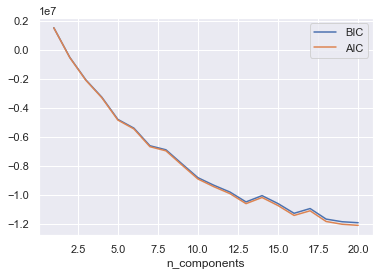

In [22]:
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

# Association

Now I will analyze the data in way to see if there are any rules that dictate when WNV can and can't be present. This is refered to as association, it is often used with super markets, to target customers who buy items together frequently, such as butter and popcorn also buy Coke. 

To continue I need to transform many of my continous values into categorical. I will be using the quantiles of values to do this. So, for examples, the bottom quartile of temperature will be "cold", then "cool", "warm, and the top quartile will be "hot". 

I will also only be using the top 15 features that were decided on previoulsy in my feature selection. 

In [81]:
train = pd.read_csv('C:/Users/deanm/OneDrive/Documents/University of Idaho/Classes/Fall 2018/STAT 517/west_nile/input/train.csv')
test = pd.read_csv('C:/Users/deanm/OneDrive/Documents/University of Idaho/Classes/Fall 2018/STAT 517/west_nile/input/test.csv')
weather = pd.read_csv('C:/Users/deanm/OneDrive/Documents/University of Idaho/Classes/Fall 2018/STAT 517/west_nile/input/weather.csv')


labels = train.WnvPresent.values


weather = weather.drop('CodeSum', axis=1)


weather_stn1 = weather[weather['Station']==1]
weather_stn2 = weather[weather['Station']==2]
weather_stn1 = weather_stn1.drop('Station', axis=1)
weather_stn2 = weather_stn2.drop('Station', axis=1)
weather = weather_stn1.merge(weather_stn2, on='Date')


weather = weather.replace('M', -1)
weather = weather.replace('-', -1)
weather = weather.replace('T', -1)
weather = weather.replace(' T', -1)
weather = weather.replace('  T', -1)


def create_month(x):
    return x.split('-')[1]

def create_day(x):
    return x.split('-')[2]

train['month'] = train.Date.apply(create_month)
train['day'] = train.Date.apply(create_day)
test['month'] = test.Date.apply(create_month)
test['day'] = test.Date.apply(create_day)

train['Lat_int'] = train.Latitude.apply(int)
train['Long_int'] = train.Longitude.apply(int)
test['Lat_int'] = test.Latitude.apply(int)
test['Long_int'] = test.Longitude.apply(int)

train = train.drop(['Address', 'AddressNumberAndStreet', 'NumMosquitos'], axis = 1)
test = test.drop(['Id', 'Address', 'AddressNumberAndStreet'], axis = 1)

train = train.merge(weather, on='Date')
test = test.merge(weather, on='Date')
train = train.drop(['Date'], axis = 1)
test = test.drop(['Date'], axis = 1)


lbl.fit(list(train['Street'].values) + list(test['Street'].values))
train['Street'] = lbl.transform(train['Street'].values)
test['Street'] = lbl.transform(test['Street'].values)

lbl.fit(list(train['Trap'].values) + list(test['Trap'].values))
train['Trap'] = lbl.transform(train['Trap'].values)
test['Trap'] = lbl.transform(test['Trap'].values)

train = train.ix[:,(train != -1).any(axis=0)]
test = test.ix[:,(test != -1).any(axis=0)]


C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:59: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\deanm\Anaconda2\lib\site-packages\ipykernel_launcher.py:60: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [52]:
train

Species  Block  Street  Trap   Latitude  Longitude  \
0      CULEX PIPIENS/RESTUANS     41      36     1  41.954690 -87.800991   
1              CULEX RESTUANS     41      36     1  41.954690 -87.800991   
2              CULEX RESTUANS     62      30     8  41.994991 -87.769279   
3      CULEX PIPIENS/RESTUANS     79     120    15  41.974089 -87.824812   
4              CULEX RESTUANS     79     120    15  41.974089 -87.824812   
5              CULEX RESTUANS     15     138    34  41.921600 -87.666455   
6              CULEX RESTUANS     25     123    35  41.891118 -87.654491   
7      CULEX PIPIENS/RESTUANS     11     134    37  41.867108 -87.654224   
8              CULEX RESTUANS     11     134    37  41.867108 -87.654224   
9              CULEX RESTUANS     11     117    38  41.896282 -87.655232   
10     CULEX PIPIENS/RESTUANS     21      45    39  41.919343 -87.694259   
11     CULEX PIPIENS/RESTUANS     22      18    41  41.921965 -87.632085   
12             CULEX RESTUANS     22      18    41  41.921965 -87.632085   
13     CULEX PIPIENS/RESTUANS     22      95    68  41.688324 -87.676709   
14             CULEX RESTUANS     22      95    68  41.688324 -87.676709   
15             CULEX RESTUANS     11      81    75  41.862292 -87.648860   
16             CULEX RESTUANS     17     112    77  41.720848 -87.666014   
17             CULEX RESTUANS     22     111    80  41.731922 -87.677512   
18              CULEX PIPIENS     22     111    80  41.731922 -87.677512   
19     CULEX PIPIENS/RESTUANS     53      46    91  41.891126 -87.611560   
20             CULEX RESTUANS     53      46    91  41.891126 -87.611560   
21     CULEX PIPIENS/RESTUANS     65      36    96  41.999129 -87.795585   
22     CULEX PIPIENS/RESTUANS     75      37   101  42.017430 -87.687769   
23             CULEX RESTUANS     15      29   106  41.907645 -87.760886   
24             CULEX RESTUANS     89      57   112  41.732984 -87.649642   
25     CULEX PIPIENS/RESTUANS     41      36     1  41.954690 -87.800991   
26             CULEX RESTUANS     41      36     1  41.954690 -87.800991   
27              CULEX PIPIENS     41      36     1  41.954690 -87.800991   
28     CULEX PIPIENS/RESTUANS     79     120    15  41.974089 -87.824812   
29             CULEX RESTUANS     79     120    15  41.974089 -87.824812   
...                       ...    ...     ...   ...        ...        ...   
10476  CULEX PIPIENS/RESTUANS     10      62    84  41.750498 -87.605294   
10477          CULEX RESTUANS     10      62    84  41.750498 -87.605294   
10478           CULEX PIPIENS     10      62    84  41.750498 -87.605294   
10479           CULEX PIPIENS     58      40    21  41.984809 -87.728492   
10480  CULEX PIPIENS/RESTUANS     40       5   129  41.659112 -87.538693   
10481          CULEX RESTUANS     40       5   129  41.659112 -87.538693   
10482           CULEX PIPIENS     40       5   129  41.659112 -87.538693   
10483          CULEX RESTUANS     91     127    10  41.992478 -87.862995   
10484  CULEX PIPIENS/RESTUANS     10     132   147  41.974689 -87.890615   
10485  CULEX PIPIENS/RESTUANS     10     132   147  41.974689 -87.890615   
10486           CULEX PIPIENS     10     132   147  41.974689 -87.890615   
10487           CULEX PIPIENS     10     132   147  41.974689 -87.890615   
10488           CULEX PIPIENS     10     132   147  41.974689 -87.890615   
10489           CULEX PIPIENS     10     132   147  41.974689 -87.890615   
10490  CULEX PIPIENS/RESTUANS     48     129   130  41.925198 -87.746381   
10491  CULEX PIPIENS/RESTUANS     51      34   131  41.973845 -87.805059   
10492           CULEX PIPIENS     51      34   131  41.973845 -87.805059   
10493  CULEX PIPIENS/RESTUANS     82      72   133  41.743402 -87.731435   
10494  CULEX PIPIENS/RESTUANS     65       9   135  41.728495 -87.600963   
10495           CULEX PIPIENS     65       9   135  41.728495 -87.600963   
10496  CULEX PIPIENS/RESTUANS     17     113   132  41.947227 -87.6714

In [27]:
import numpy as np
import pandas as pd

from scipy.stats.mstats import mquantiles



AttributeError: 'DataFrame' object has no attribute 'DataFrame'

In [82]:
test = train.drop(['AddressAccuracy','Lat_int','Long_int','Sunrise_x','Sunset_x','Heat_x','Heat_y','Cool_x','Cool_y','StnPressure_y','StnPressure_x','SeaLevel_y','SeaLevel_x','DewPoint_x','DewPoint_y','WetBulb_y','WetBulb_x','Tavg_x','Tavg_y','ResultSpeed_y','ResultSpeed_x','ResultDir_y','ResultDir_x'], axis = 1)

In [54]:
test

Species  Block  Street  Trap   Latitude  Longitude  \
0      CULEX PIPIENS/RESTUANS     41      36     1  41.954690 -87.800991   
1              CULEX RESTUANS     41      36     1  41.954690 -87.800991   
2              CULEX RESTUANS     62      30     8  41.994991 -87.769279   
3      CULEX PIPIENS/RESTUANS     79     120    15  41.974089 -87.824812   
4              CULEX RESTUANS     79     120    15  41.974089 -87.824812   
5              CULEX RESTUANS     15     138    34  41.921600 -87.666455   
6              CULEX RESTUANS     25     123    35  41.891118 -87.654491   
7      CULEX PIPIENS/RESTUANS     11     134    37  41.867108 -87.654224   
8              CULEX RESTUANS     11     134    37  41.867108 -87.654224   
9              CULEX RESTUANS     11     117    38  41.896282 -87.655232   
10     CULEX PIPIENS/RESTUANS     21      45    39  41.919343 -87.694259   
11     CULEX PIPIENS/RESTUANS     22      18    41  41.921965 -87.632085   
12             CULEX RESTUANS     22      18    41  41.921965 -87.632085   
13     CULEX PIPIENS/RESTUANS     22      95    68  41.688324 -87.676709   
14             CULEX RESTUANS     22      95    68  41.688324 -87.676709   
15             CULEX RESTUANS     11      81    75  41.862292 -87.648860   
16             CULEX RESTUANS     17     112    77  41.720848 -87.666014   
17             CULEX RESTUANS     22     111    80  41.731922 -87.677512   
18              CULEX PIPIENS     22     111    80  41.731922 -87.677512   
19     CULEX PIPIENS/RESTUANS     53      46    91  41.891126 -87.611560   
20             CULEX RESTUANS     53      46    91  41.891126 -87.611560   
21     CULEX PIPIENS/RESTUANS     65      36    96  41.999129 -87.795585   
22     CULEX PIPIENS/RESTUANS     75      37   101  42.017430 -87.687769   
23             CULEX RESTUANS     15      29   106  41.907645 -87.760886   
24             CULEX RESTUANS     89      57   112  41.732984 -87.649642   
25     CULEX PIPIENS/RESTUANS     41      36     1  41.954690 -87.800991   
26             CULEX RESTUANS     41      36     1  41.954690 -87.800991   
27              CULEX PIPIENS     41      36     1  41.954690 -87.800991   
28     CULEX PIPIENS/RESTUANS     79     120    15  41.974089 -87.824812   
29             CULEX RESTUANS     79     120    15  41.974089 -87.824812   
...                       ...    ...     ...   ...        ...        ...   
10476  CULEX PIPIENS/RESTUANS     10      62    84  41.750498 -87.605294   
10477          CULEX RESTUANS     10      62    84  41.750498 -87.605294   
10478           CULEX PIPIENS     10      62    84  41.750498 -87.605294   
10479           CULEX PIPIENS     58      40    21  41.984809 -87.728492   
10480  CULEX PIPIENS/RESTUANS     40       5   129  41.659112 -87.538693   
10481          CULEX RESTUANS     40       5   129  41.659112 -87.538693   
10482           CULEX PIPIENS     40       5   129  41.659112 -87.538693   
10483          CULEX RESTUANS     91     127    10  41.992478 -87.862995   
10484  CULEX PIPIENS/RESTUANS     10     132   147  41.974689 -87.890615   
10485  CULEX PIPIENS/RESTUANS     10     132   147  41.974689 -87.890615   
10486           CULEX PIPIENS     10     132   147  41.974689 -87.890615   
10487           CULEX PIPIENS     10     132   147  41.974689 -87.890615   
10488           CULEX PIPIENS     10     132   147  41.974689 -87.890615   
10489           CULEX PIPIENS     10     132   147  41.974689 -87.890615   
10490  CULEX PIPIENS/RESTUANS     48     129   130  41.925198 -87.746381   
10491  CULEX PIPIENS/RESTUANS     51      34   131  41.973845 -87.805059   
10492           CULEX PIPIENS     51      34   131  41.973845 -87.805059   
10493  CULEX PIPIENS/RESTUANS     82      72   133  41.743402 -87.731435   
10494  CULEX PIPIENS/RESTUANS     65       9   135  41.728495 -87.600963   
10495           CULEX PIPIENS     65       9   135  41.728495 -87.600963   
10496  CULEX PIPIENS/RESTUANS     17     113   132  41.947227 -87.6714

In [46]:
import pandas as pd
from mlxtend.frequent_patterns import apriori

In [90]:
for elem in test['Species'].unique():
    test[str(elem)] = test['Species'] == elem

In [94]:
cat_names = {'01':'Jan', '02':'Feb', '03':'Mar','04':'Apr','05':'May','06':'June','07':'July','08':'Aug','09':'Sept','10':'Oct','11':'Nov','12':'Dec'}
for elem in test['month'].unique():
    test[cat_names[elem]] = test['month'] == elem

In [132]:
cat_names = {40-50:'cold', 70:'Hot', 64:'warm',88:'Hot',92:'Very Hot',91-100:'Boiling',70:'Hot',79:'Hot', 77:'Hot',85:'Very Hot',
            83:'Very Hot',91:'Very Hot', 90:'Very Hot', 87:'Very Hot',84:'Very Hot',80:'Hot', 89:'Very Hot',82:'Very Hot',81:'Very Hot',
            60:'warm',61:'warm',62:'warm',63:'warm',64:'warm',65:'warm',66:'warm',67:'warm',68:'warm',69:'warm',
            70:'Hot',71:'Hot',72:'Hot',73:'Hot',74:'Hot',75:'Hot',76:'Hot',77:'Hot',78:'Hot',79:'Hot',
            86:'Very Hot',
             90:'Very Hot',91:'Very Hot',92:'Very Hot',93:'Very Hot',94:'Very Hot',95:'Very Hot',96:'Very Hot',97:'Very Hot',
            50:'cool',51:'cool',52:'cool',53:'cool',54:'cool',55:'cool',56:'cool',57:'cool',58:'cool',59:'cool',}
for elem in test['Tmax_x'].unique():
    test[cat_names[elem]] = test['Tmax_x'] == elem

In [135]:
cat_names = {40-50:'cold', 70:'Hot', 64:'warm',88:'Hot',92:'Very Hot',91-100:'Boiling',70:'Hot',79:'Hot', 77:'Hot',85:'Very Hot',
            83:'Very Hot',91:'Very Hot', 90:'Very Hot', 87:'Very Hot',84:'Very Hot',80:'Hot', 89:'Very Hot',82:'Very Hot',81:'Very Hot',
            60:'warm',61:'warm',62:'warm',63:'warm',64:'warm',65:'warm',66:'warm',67:'warm',68:'warm',69:'warm',
            70:'Hot',71:'Hot',72:'Hot',73:'Hot',74:'Hot',75:'Hot',76:'Hot',77:'Hot',78:'Hot',79:'Hot',
            86:'Very Hot',
             90:'Very Hot',91:'Very Hot',92:'Very Hot',93:'Very Hot',94:'Very Hot',95:'Very Hot',96:'Very Hot',97:'Very Hot',
            50:'cool',51:'cool',52:'cool',53:'cool',54:'cool',55:'cool',56:'cool',57:'cool',58:'cool',59:'cool',
            40:'cold',41:'cold',42:'cold',43:'cold',44:'cold',45:'cold',46:'cold',47:'cold',48:'cold',49:'cold'}
for elem in test['Tmin_x'].unique():
    test[cat_names[elem]] = test['Tmin_x'] == elem

In [143]:
cat_names = {'0.00':'dry','0.42':'some','0.16':'some','1.55':'wet','-1':'dry'}
for elem in test['PrecipTotal_x'].unique():
    test[cat_names[elem]] = test['PrecipTotal_x'] == elem

KeyError: -1

In [72]:
for elem in test['PrecipTotal_x'].unique():
    test[str(elem)] = test['PrecipTotal_x'] == elem

In [144]:
test=test.drop(['Latitude','Longitude','month','day','Block'], axis=1)

In [145]:
test=test.drop(['Depart_x','Depth_x','Trap','SnowFall_x','AvgSpeed_x','PrecipTotal_x','Tmin_y','Tmax_y','Tmin_x','Tmax_x','PrecipTotal_y'], axis=1)

In [146]:
test=test.drop(['Species','Street','AvgSpeed_y'], axis=1)

In [147]:
test

WnvPresent    May   June  CULEX PIPIENS/RESTUANS  CULEX RESTUANS  \
0               0   True  False                    True           False   
1               0   True  False                   False            True   
2               0   True  False                   False            True   
3               0   True  False                    True           False   
4               0   True  False                   False            True   
5               0   True  False                   False            True   
6               0   True  False                   False            True   
7               0   True  False                    True           False   
8               0   True  False                   False            True   
9               0   True  False                   False            True   
10              0   True  False                    True           False   
11              0   True  False                    True           False   
12              0   True  False                   False            True   
13              0   True  False                    True           False   
14              0   True  False                   False            True   
15              0   True  False                   False            True   
16              0   True  False                   False            True   
17              0   True  False                   False            True   
18              0   True  False                   False           False   
19              0   True  False                    True           False   
20              0   True  False                   False            True   
21              0   True  False                    True           False   
22              0   True  False                    True           False   
23              0   True  False                   False            True   
24              0   True  False                   False            True   
25              0  False   True                    True           False   
26              0  False   True                   False            True   
27              0  False   True                   False           False   
28              0  False   True                    True           False   
29              0  False   True                   False            True   
...           ...    ...    ...                     ...             ...   
10476           0  False  False                    True           False   
10477           0  False  False                   False            True   
10478           0  False  False                   False           False   
10479           0  False  False                   False           False   
10480           0  False  False                    True           False   
10481           0  False  False                   False            True   
10482           0  False  False                   False           False   
10483           0  False  False                   False            True   
10484           1  False  False                    True           False   
10485           0  False  False                    True           False   
10486           0  False  False                   False           False   
10487           0  False  False                   False           False   
10488           0  False  False                   False           False   
10489           0  False  False                   False           False   
10490           0  False  False                    True           False   
10491           0  False  False                    True           False   
10492           0  False  False                   False           False   
10493           0  False  False                    True           False   
10494           0  False  False                    True           False   
10495           0  False  False                   False           False   
10496           0  False  False                    True           False   
10497           0  False  False 

In [116]:
list(test)

['Species',
 'Block',
 'Street',
 'Trap',
 'Latitude',
 'Longitude',
 'WnvPresent',
 'month',
 'day',
 'Tmax_x',
 'Tmin_x',
 'Depart_x',
 'Depth_x',
 'SnowFall_x',
 'PrecipTotal_x',
 'AvgSpeed_x',
 'Tmax_y',
 'Tmin_y',
 'PrecipTotal_y',
 'AvgSpeed_y',
 'May',
 'June',
 'CULEX PIPIENS/RESTUANS',
 'CULEX RESTUANS',
 'CULEX PIPIENS',
 'CULEX SALINARIUS',
 'CULEX TERRITANS',
 'CULEX TARSALIS',
 'CULEX ERRATICUS',
 'July',
 'Aug',
 'Sept',
 'Oct',
 'hot',
 'warm',
 'very hot',
 'Hot',
 'Very hot',
 'Veryhot']

In [150]:
frequent_itemsets = apriori(test, min_support=0.001, use_colnames=True)

In [152]:
from mlxtend.frequent_patterns import association_rules

rules=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

In [153]:
rules

antecedents  \
0                               (dry, CULEX TERRITANS)   
1                              (CULEX TERRITANS, warm)   
2                                           (dry, Oct)   
3                        (CULEX PIPIENS/RESTUANS, Oct)   
4                                                (Oct)   
5       (dry, CULEX PIPIENS/RESTUANS, WnvPresent, Aug)   
6    (dry, CULEX PIPIENS/RESTUANS, very hot, WnvPre...   
7                     (dry, WnvPresent, Aug, very hot)   
8    (CULEX PIPIENS/RESTUANS, WnvPresent, Aug, very...   
9                          (dry, very hot, WnvPresent)   
10      (CULEX PIPIENS/RESTUANS, very hot, WnvPresent)   
11                         (WnvPresent, Aug, very hot)   
12                              (very hot, WnvPresent)   
13                                               (wet)   
14                                               (Oct)   
15                      (CULEX PIPIENS/RESTUANS, warm)   
16                                        (warm, June)   
17                                    (Sept, very hot)   
18                        (WnvPresent, CULEX RESTUANS)   
19                                          (very hot)   
20                                               (May)   
21                                              (some)   
22                                          (very hot)   
23                                        (July, some)   
24                               (some, CULEX PIPIENS)   
25                                         (dry, June)   
26                      (CULEX PIPIENS/RESTUANS, June)   
27                                              (June)   
28                                         (dry, Sept)   
29                               (dry, CULEX RESTUANS)   
..                                                 ...   
930                              (hot, CULEX RESTUANS)   
931                                        (dry, July)   
932                                         (dry, hot)   
933                                        (July, hot)   
934                                              (hot)   
935                          (Veryhot, CULEX RESTUANS)   
936                                         (dry, hot)   
937                      (CULEX PIPIENS/RESTUANS, hot)   
938                                              (hot)   
939                                        (dry, July)   
940                              (July, CULEX PIPIENS)   
941                                 (CULEX SALINARIUS)   
942                     (CULEX PIPIENS/RESTUANS, cold)   
943                                       (cold, Sept)   
944                                             (cold)   
945                                 (CULEX SALINARIUS)   
946                           (CULEX PIPIENS/RESTUANS)   
947                                             (July)   
948                   (July, Very hot, CULEX RESTUANS)   
949                              (July, Very hot, wet)   
950                        (July, CULEX RESTUANS, wet)   
951                    (Very hot, CULEX RESTUANS, wet)   
952                                   (July, Very hot)   
953                                        (July, wet)   
954                         (Very hot, CULEX RESTUANS)   
955                                    (Very hot, wet)   
956                              (CULEX RESTUANS, wet)   
957                                         (Very hot)   
958                                              (wet)   
959                                             (some)   

                            consequents  antecedent support  \
0                                (warm)            0.012184   
1                                 (dry)            0.001523   
2              (CULEX PIPIENS/RESTUANS)            0.020084   
3                                 (dry)            0.012088   
4         (dry, CULEX PIPIENS/RESTUANS)            0.026271   
5                            (very hot)            0.009899   
6    

When using association it is important to understand what some of the terms are. 
So, confidence is the reliability of a rule, so the higher the confidence the more likely Y is to occur with the set of X. It is essientaly the conditional probability that Y occurs given X. 
Support is the fequency that item sets appear in the data set, so we want a higher support to eliminate rules that may happen by chance. I needed to set the support threshold to be relatively low since the data set is very large. 
Lift is the ratio of support if X and Y are independent. If a rule has a lift above 1 we can consider this rule ot be useful, while a lift below 1 means the presence of one item may have a negative effect on another. 

In [155]:
rules[rules['consequents'] == {'WnvPresent'}]

antecedents   consequents  antecedent support  \
36                 (CULEX PIPIENS, Aug)  (WnvPresent)            0.133448   
128                         (dry, cool)  (WnvPresent)            0.014944   
258       (CULEX PIPIENS/RESTUANS, Aug)  (WnvPresent)            0.155625   
268                              (cool)  (WnvPresent)            0.014944   
483                               (Aug)  (WnvPresent)            0.357034   
531           (dry, CULEX PIPIENS, Aug)  (WnvPresent)            0.070721   
606                         (Aug, cool)  (WnvPresent)            0.014944   
721  (dry, CULEX PIPIENS/RESTUANS, Aug)  (WnvPresent)            0.090710   
752                    (dry, Aug, cool)  (WnvPresent)            0.014944   

     consequent support   support  confidence      lift  leverage  conviction  
36             0.052446  0.017228    0.129101  2.461594  0.010229    1.088018  
128            0.052446  0.001904    0.127389  2.428936  0.001120    1.085883  
258            0.052446  0.016276    0.104587  1.994179  0.008114    1.058231  
268            0.052446  0.001904    0.127389  2.428936  0.001120    1.085883  
483            0.052446  0.035884    0.100507  1.916373  0.017159    1.053430  
531            0.052446  0.007329    0.103634  1.976003  0.003620    1.057106  
606            0.052446  0.001904    0.127389  2.428936  0.001120    1.085883  
721            0.052446  0.009899    0.109129  2.080780  0.005142    1.063626  
752            0.052446  0.001904    0.127389  2.428936  0.001120    1.085883

These are the rules that invole Wnv presence. We see that often when it is august, and Culex pipiens mosquitoes WNV is present. These rules confirm the above results that species is important at determing the presence of WNV. 

In this project I have completed my goal of predicting outbreaks of west nile virus in chicago. In the feature selection we have shown that species of mosquito appears to be the most important for the modeling determing the presence of the virus, and this seems to be confirmed in the rule set. The rule with the higherst confidence, lift, and support shows that Culex pippiens mosquitoes in august have WNV. These results confirm a lot of the written literature about species being better or worse carries for the virus. 

The clustering analysis showed two clear groups, which may show days where WNV is more likely to be present, versus days when WNV is less likely to be present. 

I think with more time I could have gotten the predictive models a better accuracy and AUC score. 

In the future I think more data could be added to the set overall, such as the virus in human and bird populations, or humidity of the city. This model may be a good start for predicting the future outbreaks of disease and could help city officials spray insecticides in areas predicted to have high levels of virus. 